# Содержание
- [1. Загрузка данных и их первоначальный анализ](#1)
    - [1.1 Подготовка к работе](#2)
    - [1.2 Загрузим и изучим данные](#3)
- [2. Предобработка данных](#4)
    - [2.1 Переименование колонок](#5)
    - [2.2 Корректировка типов данных](#6)
    - [2.3 Анализ пропусков](#7)
        - [2.3.1 Пропуски в данных о возрасте клиента](#8)
        - [2.3.2 Пропуски в данных о балансе на счете у клиента](#9)
    - [2.4 Поиск неявных дубликатов](#10)
    - [2.5 Изучение аномальных значений](#11)
        - [2.5.1 Изучение распределения данных о балансе на счете клиента](#12)
        - [2.5.2 Клиенты, не имеющие продуктов банка](#13)
        - [2.5.3 Изучение заработных плат клиентов](#14)
    - [2.6 Краткий вывод после предобработки данных](#15)
- [3. Категоризация и добавление новых столбцов](#16)
    - [3.1 Определение возрастных категорий и добавление нового столбца](#17)
    - [3.2 Определение категорий балансов на счете клиентов и добавление нового столбца](#18)
    - [3.3 Определение категорий зарплат клиентов и добавление нового столбца](#19)
    - [3.4 Определение категорий баллов собственности и добавление нового столбца](#20)
    - [3.5 ](#21)
    - [3.5 Кодирование категориальных данных](#22)
- [4. Исследовательский анализ данных](#23)
    - [4.1 Анализ влияния возраста, пола и города на отток](#24)
    - [4.2 Анализ влияния оценки стоимости на отток](#25)
    - [4.3 Анализ влияния баланса на счете на отток](#26)
    - [4.4 Анализ влияния заработной платы на отток](#27)
    - [4.5 Анализ влияния количества продуктов банка на отток](#28)
    - [4.6 Анализ влияния наличия кредитной карты на отток](#29)
    - [4.7 Анализ влияния активности клиента на отток](#30)
    - [4.8 Анализ влияния баллов кредитного скоринга на отток](#31)
    - [4.9 Итоговые параметры, которые сильнее всего влияют на отток](#32)
- [5. Статистическая проверка гипотез](#33)
    - [5.1 Проверка гипотезы №1: доходы клиентов, которые ушли и которые остались отличаются](#34)
    - [5.2 Проверка гипотезы №2: баллы кредитного скоринга клиентов, которые ушли и которые остались отличаются](#35)
    - [5.3 Проверка гипотезы №3: возраст клиентов, которые ушли и которые остались отличаются](#36)
    - [5.4 Проверка гипотезы №4: баланс на счете клиентов, которые ушли и которые остались отличаются](#37)
    - [5.5 Вывод после проверок всех гипотез](#38)
- [6. Сегментация на основе стратегических показателей](#39)
    - [6.1 Выделение сегмента №1](#40)
    - [6.2 Выделение сегмента №2](#41)
    - [6.3 Выделение сегмента №3](#42)
    - [6.4 Выделение сегмента №4](#43)
    - [6.5 Выделение сегмента №5](#44)
    - [6.6 Проведем приоритизацию сегментов](#45) 
- [7. Общий вывод и рекомендации](#46)
    - [7.1 Общий вывод после всех обработок и проверок](#47)
    - [7.2 Рекомендации](#48)

# Анализ оттока клиентов
Цель - для менеджеров отдела маркетинга банка, необходимо проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка. Чтобы в дальнейшем менеджеры могли выявить и реализовать воздействие на эти сегменты для уменьшения отточности клиентов.

Входные данные - данные о клиентах банка "Метанпром", распологающегося в Ярославле и областных городах: Ростов Великий и Рыбинск.

Задачи:
- Загрузим и изучим данные и подготовим их к анализу
- Добавим необходимые для анализа столбцы

- Проанализируем данные:
  * Выявим параметры, которые больше всего влияют на отток клиентов из банка
  
- Проверим статистические гипотезы
- Проведем сегментацию на основе выявленных статистиских показателей
- Презентуем полученные результаты

## Загрузка данных и их первоначальный анализ
<a id='1'></a>

### Подготовка к работе
<a id='2'></a>

Перед началом работы, выведем все функции, которые понадобятся нам для работы, а также импортируем все необходимые библиотеки

In [1]:
#Определим функцию для вывода всей информации о данных в таблице
def inf_data(df):
    print('Первые 10 строк таблицы')
    display(df.head(10))
    pd.set_option('display.max_columns', None)
    print('----------')
    
    print('Общая информация о таблице')
    df.info()
    print('----------')
    
    print('Выведем наименование колонок')
    display(df.columns)
    print('----------')
    
    print('Посмотрим на типы данных')
    display(df.dtypes)
    print('----------')
    
    print('Проверим присутствуют ли пропуски в данных')
    display(df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False))
    print('----------')
    
    print('Проверим присутствуют ли явные дубликаты в данных')
    if df.duplicated().sum() == 0:
        print('Явных дубликатов нет')
    else:
        print('В наших данных {} записи являются дубликатами'.format(len(data[data.duplicated()])))
        display(df[df.duplicated()].head())

    print('----------')
    print('Оценим распределение количественных данных')
    df.hist(figsize=(20,20));

In [2]:
#Определим функцию для вывода гистограмы
def histogram(x, #x
              title_x, #название оси х
              title_y, #название оси y
              title_all #название графика
             ):
    fig = go.Figure(
        data=(
            go.Histogram(x=x,
                         orientation='v',
                         marker_color='lightblue'),
        )
    )
    
    fig.update_xaxes(title_text=title_x)
    
    fig.update_yaxes(title_text=title_y)
    
    fig.update_yaxes(showline=True,
                     linewidth=1,
                     linecolor='grey',
                     categoryorder='total descending',
                     gridcolor='lightgrey')
    
    fig.update_xaxes(showline=True,
                     linewidth=1,
                     linecolor='grey',
                     categoryorder='total descending')
    
    fig.update_layout(autosize=False,
                      width=980,
                      plot_bgcolor='white',
                      showlegend=False,
                      title=title_all)
    
    fig.show(renderer='png', width=1000, height=600, scale=None)

In [3]:
#Определим функцию для вывода гистограмы по разбиению на ушедших и действующих клиентов
def histogram_churn(df, #таблица
                    x, #х
                    x_title, #название оси х
                    y_title, #название оси y
                    all_title, #название графика
                    nbins=5 #количество корзин, по умолчанию 5
                   ):
    
    fig = px.histogram(df,
                       x=x,
                       nbins=nbins,
                       color='churn',
                       color_discrete_sequence=px.colors.sequential.Blugrn)
    
    fig.update_xaxes(showline=True,
                     linewidth=1,
                     linecolor='grey',
                     categoryorder='total descending',
                     title=x_title)
    
    fig.update_yaxes(showline=True,
                     linewidth=1, 
                     linecolor='grey',
                     gridcolor='lightgrey',
                     title=y_title)
    
    fig.update_layout(width=900,
                      height=500,
                      plot_bgcolor='white',
                      title_text=all_title)
    
    fig.show(renderer='png', width=1000, height=600, scale=None)

In [4]:
#Определим функцию для проверки двухсторонней статистической гипотезы
#на равенство средних двух выборок
def ttest(array1, #первая выборка
          array2, #вторая выборка
          alpha, #значение уровня стат значимости для проверки
          equal_var=True #равны ли дисперсии выборок/размеры выборок
         ):
    # result - вызов метода для проверки гипотезы (возвращает значение статистики и вероятности)
    result = st.ttest_ind(array1, array2, equal_var=equal_var, nan_policy='omit')
    # nan_policy='omit' - игнорировать пропуски
    
    alpha = alpha #уровень стат значимости, если вероятность получить результат
                #будет меньше него - то мы отвергнем нулевую гипотезу
        
    print('p-значение', result.pvalue)
    
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [5]:
#Определим функцию для проверки (односторонней) статистической гипотезы,
#что среднее одной выборки больше среднего другой выборки
def ttest_one(array1, #первая выборка (отточные)
              array2, #вторая выборка (действующие)
              alpha, #значение уровня стат значимости для проверки
              equal_var=True #равны ли дисперсии выборок/размеры выборок
             ):
    # result - вызов метода для проверки гипотезы (возвращает значение статистики и вероятности)
    result = st.ttest_ind(array1, array2, equal_var=equal_var, nan_policy='omit')
    # nan_policy='omit' - игнорировать пропуски
    
    alpha = alpha #уровень стат значимости, если вероятность получить результат
                #будет меньше него - то мы отвергнем нулевую гипотезу
        
    print('p-значение', result.pvalue)
    
    if result.pvalue/2 < alpha and array1.mean() < array2.mean():
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [6]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go

### Загрузим и изучим данные
<a id='3'></a>

In [7]:
#Откроем наши данные
path = 'https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F'
try:
    data_banks = pd.read_csv(path)
except:
    data_banks = pd.read_csv('bank_scrooge.csv')

Первые 10 строк таблицы


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


----------
Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
----------
Выведем наименование колонок


Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

----------
Посмотрим на типы данных


USERID             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

----------
Проверим присутствуют ли пропуски в данных


balance    2295
age          26
dtype: int64

----------
Проверим присутствуют ли явные дубликаты в данных
Явных дубликатов нет
----------
Оценим распределение количественных данных


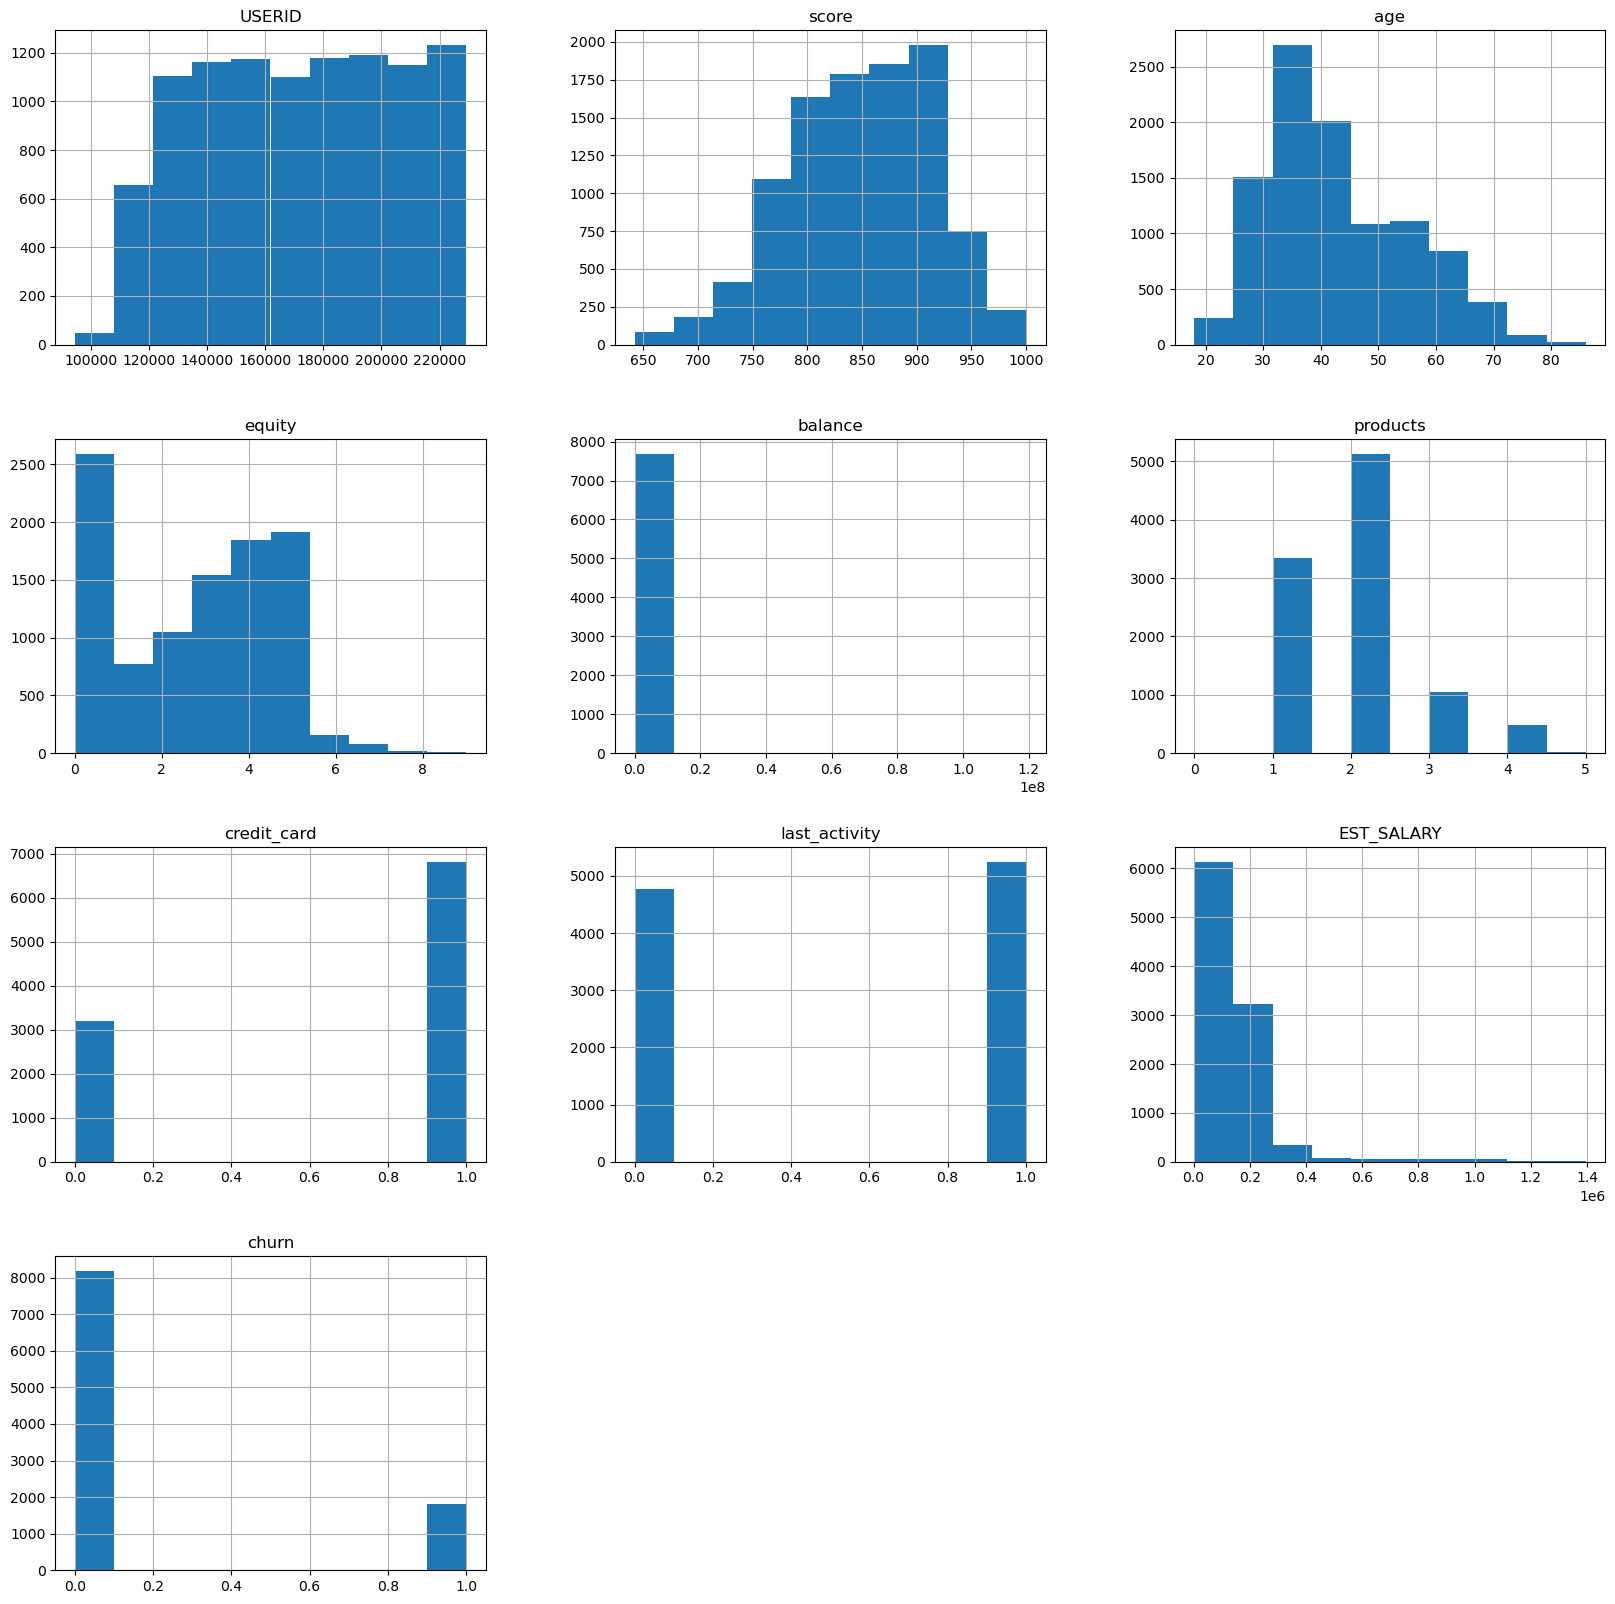

In [8]:
#Посмотрим основную информацию об имеющихся данных
inf_data(data_banks)

В нашем распоряжении данные о 10000 клиентов банка, включающие в себя инормацию о:
- идентификаторе пользователя,
- баллов кредитного скоринга,
- город проживания, пол и возраст клиента,
- количество баллов собственности,
- баланс на счете, также количество продуктов, которыми пользуется клиент,
- заработная плата клиента,
- и отметки о наличии кредитной карты, активности клиента и факте его ухода

Первое, что бросилось в глаза - некорректное наименование колонок, что необходимо будет исправить.

Также некоторые типы данных нужно будет изменить на необходимые:
- отметки о наличии кредитной карты, активности и ухода клиента - должны быть логическими (да/нет)
- посмотреть почему данные о баллах кредитного скоринга и возрасте имеют вещественный тип, а не целочисленный

В данных присутствуют пропуски в колонках о балансе клиента и о его возрасте, нужно будет их изучить и при возможности заменить на логические значения.

Явных дубликатов не выявлено, однако необходимо проверить на неявные дублирующие значения в колонке об идентификаторе пользователя

По первичной оценки распределения количественных значений:
- можно предположить, что в данных о балансе на счете у клиента могут быть аномальные значения,
- есть клиенты без "продуктов" банка, нужно изучить их,
- также возможно присутствуют клиенты с достаточно большими заработными платами и с полным ее отсутствием, что также необходимо изучить

Посмотрим на данные о городах проживания и полу клиентов

In [9]:
data_banks['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Все города верны, лишних не появилось

In [10]:
data_banks['gender'].unique()

array(['Ж', 'М'], dtype=object)

Деление на пол в данных верно

Приступаю к предобработки данных

## Предобработка данных
<a id='4'></a>

Перед предобработкой сохраним ифнормацию об изначальном размере данных

In [11]:
original_size_data = len(data_banks)

### Переименование столбцов
<a id='5'></a>

Приведем все наименования колонок к нижнему регистру и добавим `_`, где необходимо

In [12]:
data_banks.columns = data_banks.columns.str.lower()
data_banks = data_banks.rename(columns = {'userid':'user_id'})
data_banks.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Корректировка типов данных
<a id='6'></a>

Посмотрим на данные об отметках **о наличии кредитной карты**, **активности** и **ухода клиента** - все эти данные должны быть логическими (да/нет)

In [13]:
print(
    ('Уникальные значения колонки о наличии кредитной карты - {},\
    уникальные значения колонки об активности клиента - {},\
    уникальные значения колонки о факте ухода клиента - {}')
    .format(data_banks['credit_card'].unique(), data_banks['last_activity'].unique(), data_banks['churn'].unique())
)

Уникальные значения колонки о наличии кредитной карты - [0 1],    уникальные значения колонки об активности клиента - [1 0],    уникальные значения колонки о факте ухода клиента - [1 0]


Все значения этих колонок состот лишь из двух вариантов - 0 и 1, значит действительно тип этих колонок должен быть логическим. Изменим

In [14]:
col = ['credit_card', 'last_activity', 'churn']
for c in col:
    data_banks[c] = data_banks[c].astype('bool')

In [15]:
#Проверим верно ли изменились типы данных
data_banks.dtypes

user_id            int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card         bool
last_activity       bool
est_salary       float64
churn               bool
dtype: object

Верная корректировка. Теперь посмотрим на данные о **баллах кредитного скоринга** и о **возрасте** клиентов

In [16]:
print('Минимальный балл кредитного скоринга - {}, максимальный балл кредитного скоринга - {}'
      .format(data_banks['score'].min(),
              data_banks['score'].max()))
data_banks['score'].unique()

Минимальный балл кредитного скоринга - 642.0, максимальный балл кредитного скоринга - 1000.0


array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [17]:
print('Минимальный возраст клиента - {}, максимальный возраст клиента - {}'
      .format(data_banks['age'].min(),
              data_banks['age'].max()))
data_banks['age'].unique()

Минимальный возраст клиента - 18.0, максимальный возраст клиента - 86.0


array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

Действительно, все значения в данных колонках реалистичные и должны быть целочисленными. Однако из-за того, что в данных о возрасте присутствуют пропущенные значения, данные в этом столбце преобразовать в целочисленный не получится. Изменим тип данных лишь в столбце с баллами.

In [18]:
data_banks['score'] = data_banks['score'].astype('int64')

In [19]:
#Проверим верно ли изменился тип данных
data_banks.dtypes

user_id            int64
score              int64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card         bool
last_activity       bool
est_salary       float64
churn               bool
dtype: object

### Анализ пропусков
<a id='7'></a>

Напомним столбцы с пропусками

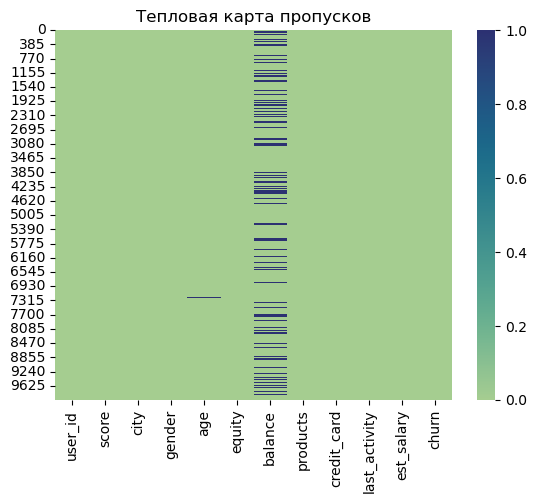

In [20]:
sns.heatmap(data_banks.isna(), cmap='crest')
plt.title('Тепловая карта пропусков');

У нас присутствует очень мало пропусков в данных о возрасте и достаточно много пропусков в данных о балансе на счете клиента. Изучим данные пропуски

#### Пропуски в данных о возрасте клиента
<a id='8'></a>

In [21]:
print('Количество клиентов с отсутствием информации о возрасте - {}'
      .format(data_banks['age'].isna().sum()))

print('Доля этих клиентов - {0:.2%}'
      .format(data_banks['age'].isna().sum()/original_size_data))

data_banks.query('age.isna()')

Количество клиентов с отсутствием информации о возрасте - 26
Доля этих клиентов - 0.26%


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,True,True,408121.16,False
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,True,True,160368.82,False
2444,221156,913,Ярославль,М,NaN,0,NaN,1,True,True,135693.24,False
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,False,True,63310.22,True
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,False,True,93775.06,False
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,True,True,67835.95,False
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,True,True,137500.77,False
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,True,True,85002.15,False
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,True,False,159248.67,False
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,False,True,75206.90,False


26 клиентов с отсутствием данных о возрасте, так еще и у 16 из них отсутствует информация о балансе на счете. Найти логичной замены пропущенных значений о возрасте не представляется возможным. Целесообразно удалить данные об этих клиентах - потеряем менее 1 % данных.

In [22]:
data_banks = data_banks.query('~age.isna()').reset_index(drop=True)
data_banks

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,False,True,75719.14,True
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,True,False,86621.77,False
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,True,True,107683.34,False
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,False,True,174423.53,True
4,157978,730,Ярославль,М,34.0,5,174.00,1,True,False,67353.16,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9969,120553,814,Рыбинск,М,27.0,1,78144.65,1,False,True,18943.64,False
9970,139170,894,Ярославль,М,46.0,0,NaN,1,True,False,196898.29,False
9971,115639,903,Ярославль,М,24.0,0,NaN,2,True,True,108905.09,False
9972,148700,777,Ярославль,Ж,68.0,3,865457.97,3,False,True,86874.90,False


Теперь, когда у нас нет в столбце о возрасте пропущенных значений, можем изменить тип на целочисленный

In [23]:
data_banks['age'] = data_banks['age'].astype('int64')
data_banks.dtypes

user_id            int64
score              int64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card         bool
last_activity       bool
est_salary       float64
churn               bool
dtype: object

#### Пропуски в данных о балансе на счете у клиента
<a id='9'></a>

In [24]:
print('Количество клиентов с отсутствием информации о балансе на счете - {}'
      .format(data_banks['balance'].isna().sum()))

print('Доля этих клиентов - {0:.2%}'
      .format(data_banks['balance'].isna().sum()/original_size_data))

data_banks.query('balance.isna()')

Количество клиентов с отсутствием информации о балансе на счете - 2279
Доля этих клиентов - 22.79%


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False
10,148929,927,Ростов,М,52,0,NaN,1,True,True,196820.07,False
11,172184,921,Ростов,М,41,0,NaN,1,True,True,217469.48,False
19,127034,922,Рыбинск,Ж,53,0,NaN,1,False,False,147094.82,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,208085,876,Ростов,М,38,0,NaN,1,False,False,171763.69,False
9958,125941,729,Ярославль,Ж,42,0,NaN,1,True,True,687538.70,False
9967,219924,884,Рыбинск,Ж,36,0,NaN,1,True,True,169844.88,False
9970,139170,894,Ярославль,М,46,0,NaN,1,True,False,196898.29,False


2279 клиентов с отсутствием информации о наличии хоть какого то баланса на своих счетах, это почти 23% (практически четверть) от всех клиентов. Это достаточно много. Давайте посмотрим, есть ли что то обобщащее эти пропуски

**Из каких городов клиенты с пропусками в балансе**

In [25]:
data_banks.query('balance.isna()')['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Клиенты из всех городов

**Какого пола клиенты с пропусками в балансе**

In [26]:
data_banks.query('balance.isna()')['gender'].unique()

array(['Ж', 'М'], dtype=object)

Клиенты обоих полов

**Какого возраста клиенты с пропусками в балансе**

In [27]:
sorted(data_banks.query('balance.isna()')['age'].unique())

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 86]

Клиенты всех возрастов

**Какая оценка собственности у клиентов с пропусками в балансе**

In [28]:
data_banks.query('balance.isna()')['equity'].unique()

array([0, 1, 3], dtype=int64)

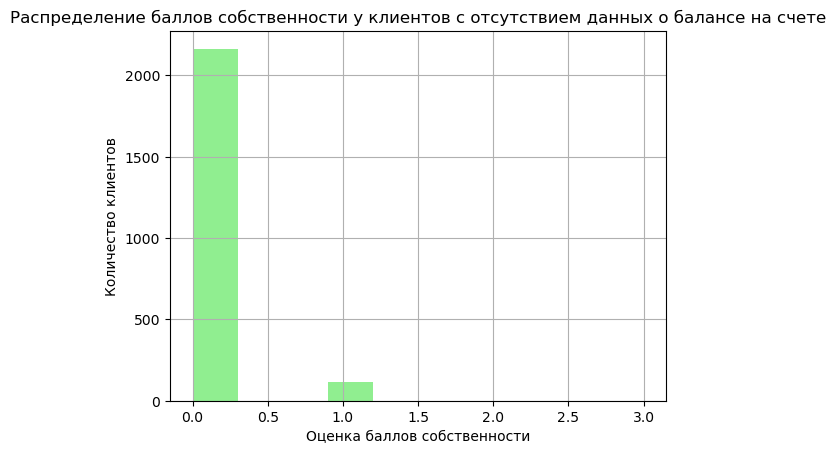

In [29]:
data_banks.query('balance.isna()')['equity'].hist(color = 'lightgreen')
plt.title('Распределение баллов собственности у клиентов с отсутствием данных о балансе на счете')
plt.xlabel('Оценка баллов собственности')
plt.ylabel('Количество клиентов');

Оценка собственности разделяется от 0 до 9, а у клиентов с пропущенными значениями в балансе оценка собственности либо 0, либо 1, либо 3 - то есть они имеют не дорогую собственность. Причем больше всего клиентов с отсутствием собственности.

**Сколько продуктов банка у клиентов с пропусками в балансе**

In [30]:
data_banks.query('balance.isna()')['products'].unique()

array([1, 2, 3, 0], dtype=int64)

Клиенты с любым количеством продуктов банка

**Есть ли кредитные карты у клиентов с пропусками в балансе**

In [31]:
data_banks.query('balance.isna()')['credit_card'].unique()

array([ True, False])

У таких клиентов и есть и нет кредитные карты

**Активны ли клиенты с пропусками в балансе**

In [32]:
data_banks.query('balance.isna()')['last_activity'].unique()

array([ True, False])

Такие клиенты и активные и нет

**Ушли ли клиенты с пропусками в балансе**

In [33]:
data_banks.query('balance.isna()')['churn'].unique()

array([False,  True])

Есть и ушедшие и действующие клиенты банка

**Какие заработные платы у клиентов с пропусками в балансе**

In [34]:
print('Минимальная зарплата клиентов с отсутствием информации о балансе - {},\
 максимальная зарплата клиентов с отсутствием информации о балансе - {}'
      .format(data_banks.query('balance.isna()')['est_salary'].min(), 
              data_banks.query('balance.isna()')['est_salary'].max()))

Минимальная зарплата клиентов с отсутствием информации о балансе - 20274.03, максимальная зарплата клиентов с отсутствием информации о балансе - 1333687.36


Клиенты с любой заработной платой

Единственное, что характеризует выборку клиентов с отсутствием информации о балансе на счете - очень низкая оценка собственности, точнее практически полное ее отсутствие. Невозможно привязать какое то конкретное значение баланса к оценки собственности, поэтому логической замены пропущенных значений найти невозможнго. Удаление почти четверти данных приведет к недостоверности дальнейшего анализа. Поэтому оставляем пропущенные значения как есть

### Поиск неявных дубликатов
<a id='10'></a>

Напомним, явных дубликатов выявлено не было, однако необходимо проверить на наличие неявных дублирующих значения в колонке об идентификаторе пользователя. Так идентификатор пользователя должен быть уникальным

In [35]:
print('Количество записей с дублями идентификаторов пользователя - {}'
      .format(len(data_banks[data_banks['user_id'].duplicated()])))
data_banks[data_banks['user_id'].duplicated()]

Количество записей с дублями идентификаторов пользователя - 50


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1582,190253,726,Ярославль,М,49,0,NaN,1,True,True,177700.78,False
1836,210662,896,Рыбинск,Ж,37,0,NaN,2,False,False,90916.04,False
2137,131419,739,Рыбинск,Ж,37,3,1307941.65,3,False,False,103867.47,False
2300,220816,934,Рыбинск,Ж,74,5,1294285.39,3,True,False,95606.80,False
2995,208081,821,Рыбинск,Ж,62,3,493608.26,2,True,True,33491.45,False
3036,170312,813,Рыбинск,Ж,47,3,370027.67,2,False,False,129835.56,False
3102,185748,912,Ярославль,Ж,47,5,1598218.98,2,False,False,180256.98,False
3813,211130,918,Рыбинск,Ж,55,0,NaN,2,True,True,244202.04,False
4182,217643,804,Рыбинск,Ж,40,2,301836.65,2,True,True,81137.22,False
4212,226719,903,Рыбинск,Ж,63,0,NaN,1,True,False,138582.58,False


Нашлось 50 записей с дублирующими идентификаторами пользователей. Однако строки у этих пользователей не идентичны. Посмотрим в чем отличие, на примере некоторых пользователей

In [36]:
data_banks.query('user_id == 190253')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823,Рыбинск,М,37,4,373348.39,2,False,True,131947.92,True
1582,190253,726,Ярославль,М,49,0,NaN,1,True,True,177700.78,False


In [37]:
data_banks.query('user_id == 210662')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962,Ярославль,Ж,54,5,5069231.39,1,True,True,955144.85,True
1836,210662,896,Рыбинск,Ж,37,0,NaN,2,False,False,90916.04,False


In [38]:
data_banks.query('user_id == 131419')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934,Ярославль,М,35,5,2348335.95,2,False,False,217105.13,True
2137,131419,739,Рыбинск,Ж,37,3,1307941.65,3,False,False,103867.47,False


Мы видим, что хоть и идентификатор у пользователей одинаковый, но это совершенно разные клиенты. Посмотрим найдутся ли дублирующие клиенты по совмещению идентификатора пользователя с другими данными

In [39]:
#Дублирующие значения по паре "идентификатор-город"
data_banks[data_banks[['user_id', 'city']].duplicated()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


У дублирующих идентификаторов разные города

In [40]:
#Дублирующие значения по паре "идентификатор-возраст-пол"
data_banks[data_banks[['user_id', 'age', 'gender']].duplicated()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5192,155765,923,Рыбинск,М,30,0,NaN,1,True,True,120296.60,False
8481,227795,839,Ярославль,М,34,2,326593.14,2,True,False,103314.92,False


У двух дубликатов идентификаторов сходится возраст и пол. Посмотрим на эти строки подробнее

In [41]:
data_banks.query('user_id == 155765')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3270,155765,863,Ярославль,М,30,5,1036114.5,5,True,True,150744.5,True
5192,155765,923,Рыбинск,М,30,0,NaN,1,True,True,120296.6,False


In [42]:
data_banks.query('user_id == 227795')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8192,227795,840,Рыбинск,М,34,2,350768.03,1,True,False,102036.14,True
8481,227795,839,Ярославль,М,34,2,326593.14,2,True,False,103314.92,False


В обоих случаях, мы не можем с точностью утверждать, что это один и тот же клиент. Посмотрим совмещение идентификатора и заработной платы

In [43]:
#Дублирующие значения по паре "идентификатор-заработная плата"
data_banks[data_banks[['user_id', 'est_salary']].duplicated()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Таких дубликатов нет. Посмотрим что примерно общего может быть в данной выборке клиентов с дублирующими идентификаторами

In [44]:
#Создаем список дублирующих идентификаторов
list_dupl_user = (
    list(data_banks[data_banks['user_id'].duplicated()]
    ['user_id']
    .unique())
)

In [45]:
#Создаем выборку записей только с отобранными идентификаторами
data_dupl_user = data_banks.query('user_id == @list_dupl_user')

Посмотрим уникальные значения каждых колонок в полученных данных

In [46]:
for col in data_dupl_user.columns:
    print('По колонке - {}'.format(col))
    display(data_dupl_user[col].unique())

По колонке - user_id


array([164676, 185748, 197364, 190253, 152479, 170312, 210662, 131419,
       149365, 155872, 211130, 123461, 208081, 208738, 140377, 220816,
       116540, 217643, 195884, 141265, 150667, 199312, 226719, 172142,
       181526, 155765, 208815, 163207, 191520, 160075, 129785, 171751,
       217619, 217826, 126368, 117943, 210792, 168998, 148826, 143592,
       188957, 162053, 120258, 217412, 210627, 175730, 124450, 227795,
       183510, 200863], dtype=int64)

По колонке - score


array([860, 850, 928, 823, 768, 901, 962, 934, 877, 896, 833, 829, 873,
       897, 726, 802, 840, 883, 845, 739, 906, 858, 813, 948, 990, 918,
       821, 912, 863, 853, 773, 899, 904, 804, 903, 874, 842, 909, 855,
       889, 884, 886, 923, 895, 885, 832, 764, 811, 921, 723, 766, 839,
       908, 905, 882, 751, 838, 879, 790, 864, 930, 880, 887, 846, 767,
       859, 793, 922, 786, 911, 933, 800, 931, 714, 949, 824, 862, 758,
       816], dtype=int64)

По колонке - city


array(['Ярославль', 'Рыбинск'], dtype=object)

По колонке - gender


array(['М', 'Ж'], dtype=object)

По колонке - age


array([37, 36, 53, 42, 33, 54, 35, 41, 55, 59, 31, 45, 49, 26, 29, 74, 44,
       30, 62, 47, 25, 34, 40, 63, 39, 32, 48, 56, 68, 22, 52, 60, 38, 64,
       69, 77, 61, 43, 46, 57], dtype=int64)

По колонке - equity


array([5, 6, 4, 0, 3, 2, 1, 7], dtype=int64)

По колонке - balance


array([  648594.03,  1203376.67,  1347183.86,   373348.39,   126787.79,
        3276783.93,  5069231.39,  2348335.95,   819182.01,  1113656.92,
        1231184.9 ,    96222.44,   232814.75,   859018.19,         nan,
         539863.29,  1193287.13,   362756.49,   733098.45,  1307941.65,
        1354552.83,   471599.16,  1294285.39,    62504.47,  3095721.85,
       14648692.14,  1009073.14,  1366382.35,   493608.26,   370027.67,
        1598218.98,  1036114.5 ,   239421.18,   543839.62,  1219918.08,
        1647814.67,  2427737.6 ,   301836.65,   292054.42,   844055.83,
         439747.65,  1322623.29,  1036832.93,  2228037.2 ,   394780.61,
        1470273.14,  1201087.46,   374959.62,   508919.15,  1044316.88,
         288110.09,   857011.13,   218199.47,  1102438.37,  2213581.63,
         893392.91,   396568.03,   652776.6 ,   568140.15,   111202.01,
        1527225.32,  1123967.02,   216764.74,   662646.97,   516811.2 ,
         350768.03,   476496.99,   326593.14,   347818.88,   448

По колонке - products


array([2, 4, 3, 1, 5], dtype=int64)

По колонке - credit_card


array([ True, False])

По колонке - last_activity


array([ True, False])

По колонке - est_salary


array([213586.86,  89401.82, 168189.49, 131947.92, 143233.23, 358700.96,
       955144.85, 217105.13, 212316.47, 291176.85, 187758.38, 102771.55,
       122505.86, 145510.08, 177700.78, 112167.83,  76434.94,  90916.04,
       175920.48,  41443.01, 103867.47, 270678.42, 148806.88,  95606.8 ,
       152393.79, 307234.69, 934412.61,  70866.29,  97932.95,  33491.45,
       129835.56, 180256.98, 150744.5 ,  48638.  , 105281.97, 244202.04,
       119933.13, 151888.42, 188856.75,  81137.22, 138582.58,  20528.56,
       133999.76, 116736.75, 140675.66, 107792.71,  96173.48, 207978.09,
       510577.1 , 120296.6 , 118058.52,  88223.89, 118465.34, 197600.97,
        71211.66,  46055.32,  56971.91, 113512.57,  83955.65, 120356.44,
       116500.81, 160327.77, 146427.96,  69622.58,  45608.45,  97545.36,
       231658.67,  32835.45, 162999.17, 148336.26, 137718.93, 119247.61,
        77100.85, 138403.6 , 880005.05,  95144.63, 102036.14,  46147.06,
        28843.54, 103314.92, 129015.25,  66063.13, 

По колонке - churn


array([ True, False])

Единственное, что можно выделить - клиенты с дублирующими идентификаторами - только из Ярославля и Рыбинска. Третий город (Ростов Великий) не фигурирует. Из этого можно предположить, что скорее всего произошел технический сбой при сборе данных.

### Изучение аномальных значений
<a id='11'></a>

По первичной оценки распределения количественных значений, мы:
- предположили, что в данных о балансе на счете у клиента могут быть аномальные значения,
- увидели, что есть клиенты без "продуктов" банка, нужно изучить их,
- заметили, что возможно присутствуют клиенты с достаточно большими заработными платами и с полным ее отсутствием, что также необходимо изучить

#### Изучение распределения данных о балансе на счете клиента
<a id='12'></a>

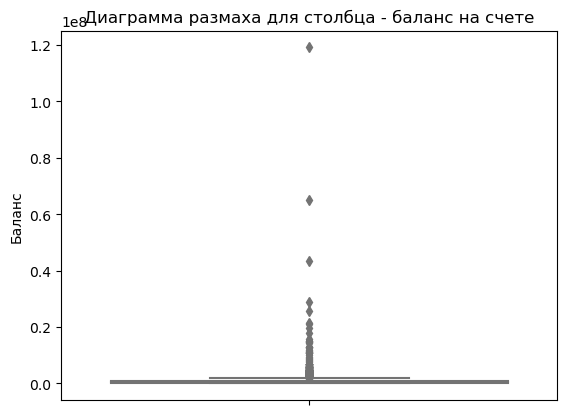

In [47]:
sns.boxplot(y='balance', data=data_banks, color='lightgreen')
plt.title('Диаграмма размаха для столбца - баланс на счете')
plt.ylabel('Баланс');

Видим, 1 максимально большое значение баланса более 80 млн:

In [48]:
data_banks.query('balance > 80000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7586,156149,900,Ярославль,М,62,5,1.191136e+08,2,True,True,138041.31,False


Несколько крупных значений более 40 млн, но менее 80 млн:

In [49]:
data_banks.query('balance > 40000000 and balance < 80000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894,Ярославль,М,58,4,64866210.15,2,True,True,88861.6,True
1845,114088,927,Ярославль,М,57,5,43277099.84,3,False,True,82619.0,False


Видим, что это возрастные активные клиенты, значит логически у них возможно реальное наличие таких сумм на балансе.

Однако не понятно в каком диапазоне значений находится большая часть балансов клиентов. Поэтому посмотрим на распределение балансов менее 8 млн

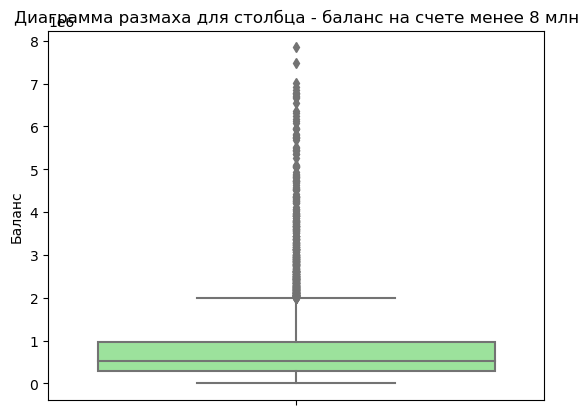

In [50]:
sns.boxplot(y='balance', data=data_banks.query('balance < 8000000'), color='lightgreen')
plt.title('Диаграмма размаха для столбца - баланс на счете менее 8 млн')
plt.ylabel('Баланс');

Теперь видим, что основная доля клиентов располагает балансами до 2 млн.

#### Клиенты, не имеющие продуктов банка
<a id='13'></a>

In [51]:
data_banks.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,147837,962,Рыбинск,Ж,79,3,NaN,0,False,False,25063.96,True


Всего 1 неактивный возрастной клиент без продукта банка и без данных о балансе, без кредитной карты и который покинул банк. Хоть он и единичный, этот клиент может быть важен для анализа - ведь возможно именно из-за отсутствия понравившихся продуктов клиент и ушел. Поэтому оставим данные о нем.

#### Изучение заработных плат клиентов
<a id='14'></a>

Минимальная зарплата клиентов - 2546.3, максимальная зарплата клиентов - 1395064.45


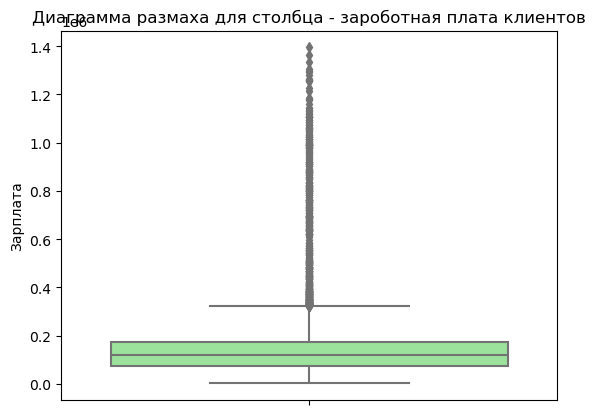

In [52]:
print('Минимальная зарплата клиентов - {}, максимальная зарплата клиентов - {}'
      .format(data_banks['est_salary'].min(), data_banks['est_salary'].max()))
sns.boxplot(y='est_salary', data=data_banks, color='lightgreen')
plt.title('Диаграмма размаха для столбца - зароботная плата клиентов')
plt.ylabel('Зарплата');

Видим, что в основном присутствуют клиенты с заработной платой от ее минимума - около 2,5 тыс и примерно до 400 тыс. Есть индивидумы с заработной платой свыше 1 млн. Посмотрим на индивидумов с такой высокой зарплатой

In [53]:
data_banks.query('est_salary > 1000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000,Ярославль,М,32,5,19757180.85,2,True,True,1024626.50,False
149,218801,958,Ярославль,М,34,0,NaN,1,True,False,1292825.74,False
178,226887,890,Ярославль,М,49,4,3956103.10,2,True,False,1120528.70,False
250,210357,766,Ярославль,М,27,0,NaN,1,True,False,1015754.12,False
296,204143,925,Ярославль,М,25,0,NaN,2,True,False,1001009.40,False
302,164876,942,Ярославль,М,40,0,NaN,1,True,False,1256537.74,False
663,180853,949,Ярославль,М,45,0,NaN,1,True,False,1142166.48,False
996,127574,749,Ярославль,М,35,0,NaN,1,True,False,1071600.78,False
1027,119793,1000,Ярославль,М,50,5,12909691.02,1,True,False,1253653.40,False
1272,136567,961,Ярославль,М,31,0,NaN,1,True,False,1015386.14,True


Видим, что все клиенты с зарплатой выше 1 млн - жители Ярославля, разного возраста, с разным балансом денежных средств. То есть кроме общего города и высоких заработных плат их более ничего не объединяет. Скорее всего это возможные данные.

Посотрим, какая потеря в данных после всех обработок

In [54]:
print('Доля потерянных данных, после проделанной обработки - {0:.2%}'
      .format(1-len(data_banks)/original_size_data))

Доля потерянных данных, после проделанной обработки - 0.26%


Минимальные не существенные потери

### Краткий вывод после предобработки данных
<a id='15'></a>

Привели наименование колонок к нижнему регистру и в наименовании колонки об уникальном идентификаторе добавили `_`.

Изменили типы данных в:
- отметках о наличии кредитной карты, активности и ухода клиента - сделали их логическими (да/нет),
- данных о баллах кредитного скоринга - сделали их целочисленными,
- данных о возрасте не смогли изменить тип на целочисленный из-за присутствия пропущенных значений, поэтому сначала проанализировали пропущенные значения, удалили их и далее изменили тип данных на целочисленный

Оценили пропущенные значения в данных о возрасте (0,26%) и балансе на счете клиентов (почти 23%). Клиентов с пропусками в возрасте удалили из наших данных, а клиентов с отсутствием информации о балансе на счете оставили их как есть, потому что нет логической замены этих пропусков.

Нашли 50 дублиующихся идентификатора пользователя, однако это совершенно разные клиенты. Единственное, что можно выделить - это клиенты только из Ярославля и Рыбинска. Третий город (Ростов Великий) не фигурирует. Из этого можно предположить, что скорее всего произошел технический сбой при сборе данных.

Выяснили, что в данных о балансе на счете клиента аномальных значений нет, все значения логичны. Основная часть клиентов имеет на счетах от 0 до 2 млн.

Нашли 1 клиента без продуктов банка, который к тому же и ушел.

Выяснили, что в основном присутствуют клиенты с заработной платой от ее минимума - около 2,5 тыс и примерно до 400 тыс. Есть индивидумы с заработной платой свыше 1 млн, но это возможные значения.

Таким образом аномалий в данных не было выявлено.

Для дальнейшего анализа необходимо ввети категоризацию возраста, баланса на счете и заработной платы клиентов

## Категоризация и добавление новых столбцов
<a id='16'></a>

### Определение возрастных категорий и добавление нового столбца
<a id='17'></a>

Помотрим, как распределены возраста, особенно в разрезе на ушедших и действующих клиентов

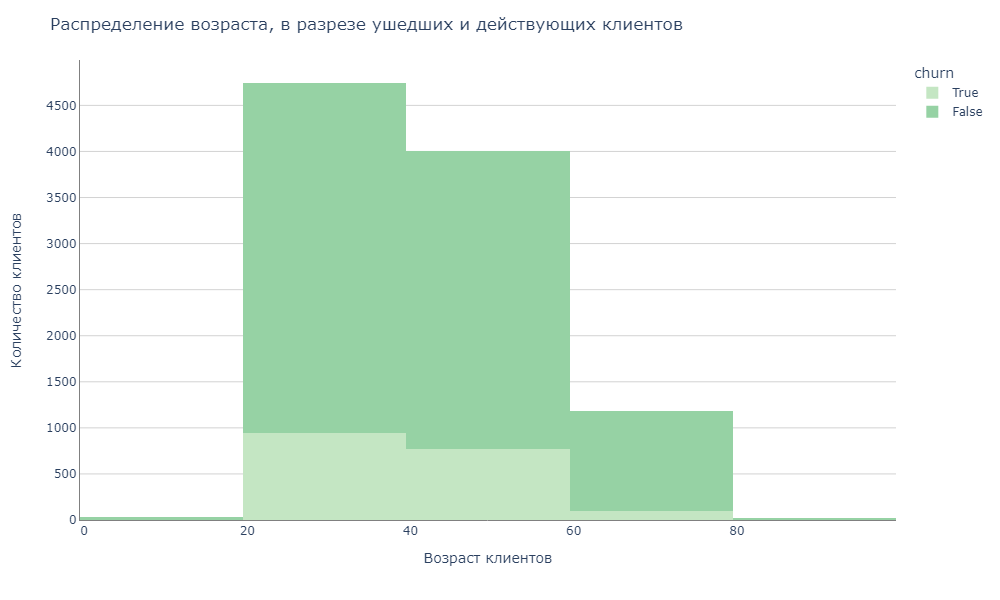

In [55]:
histogram_churn(data_banks, #таблица
                'age', #х
                'Возраст клиентов', #название оси х
                'Количество клиентов', #название оси y
                'Распределение возраста, в разрезе ушедших и действующих клиентов', #название графика
                nbins=5 #количество корзин, по умолчанию 5
               )

Видим, что можно выделить три четких группы - до 20 лет, с 20 до 60 лет и клиенты старше 60 лет. Добавим необходимый столбец с возрастными категориями

In [56]:
#Создадим функцию, которая будет возвращать обобщенное название возрастной категории
def age_cat(age):
    if age < 20:
        return "до 20 лет"
    if age >= 20 and age < 60:
        return "от 20 до 60 лет"
    return "старше 60 лет"


#Добавим новый столбец в наши данные с обобщенными категориями
data_banks['age_cat'] = data_banks['age'].apply(age_cat)

In [57]:
#Проверим все ли верно добавилось
data_banks['age_cat'].unique()

array(['от 20 до 60 лет', 'старше 60 лет', 'до 20 лет'], dtype=object)

In [58]:
data_banks.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет


### Определение категорий балансов на счете клиентов и добавление нового столбца
<a id='18'></a>

Ранее мы выяснили, что основная группа клиентов хранит на балансе от 0 до 2 млн, соответственно сразу можно выделить баланс выше 2 млн как отдельную категорию. Помотрим, как распределены остальные балансы на счете клиентов, особенно в разрезе на ушедших и действующих клиентов.

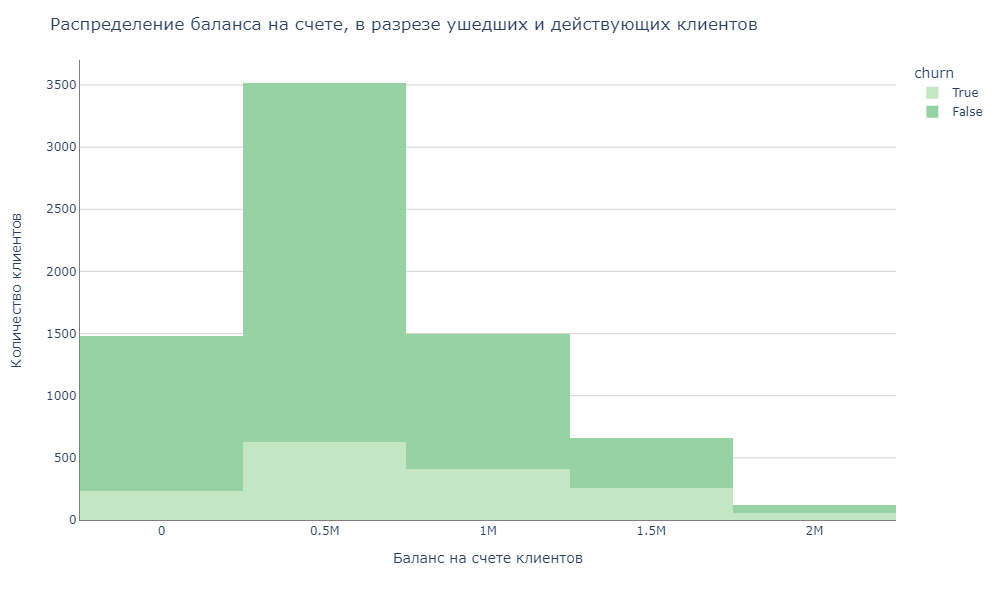

In [59]:
histogram_churn(data_banks.query('balance < 2000000'), #таблица
                'balance', #х
                'Баланс на счете клиентов', #название оси х
                'Количество клиентов', #название оси y
                'Распределение баланса на счете, в разрезе ушедших и действующих клиентов', #название графика
                nbins=5 #количество корзин, по умолчанию 5
               )

Можно выделить следующие категории по балансам денежных средств на счете:
- баланс до 250 тыс,
- баланс от 250 до 750 тыс,
- баланс от 750 тыс до 1,25 млн,
- баланс от 1,25 до 1,75 млн,
- баланс свыше 1,75 млн (в эту же категорию включаем баланс свыше 2 млн)

Добавим необходимый столбец

In [60]:
#Создадим функцию, которая будет возвращать название категории баланса
def balance_cat(balance):
    if balance < 250000:
        return "до 250 тыс"
    if balance >= 250000 and balance < 750000:
        return "от 250 до 750 тыс"
    if balance >= 750000 and balance < 1250000:
        return "от 750 тыс до 1,25 млн"
    if balance >= 1250000 and balance < 1750000:
        return "от 1,25 до 1,75 млн,"
    if  balance >= 1750000:
        return "свыше 1,75 млн"
    return "отсутствует информация о балансе"


#Добавим новый столбец в наши данные с обобщенными категориями
data_banks['balance_cat'] = data_banks['balance'].apply(balance_cat)

In [61]:
#Проверим все ли верно добавилось
data_banks['balance_cat'].unique()

array(['до 250 тыс', 'от 750 тыс до 1,25 млн',
       'отсутствует информация о балансе', 'от 1,25 до 1,75 млн,',
       'от 250 до 750 тыс', 'свыше 1,75 млн'], dtype=object)

In [62]:
data_banks.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat,balance_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет,до 250 тыс
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн"
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет,отсутствует информация о балансе
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет,"от 1,25 до 1,75 млн,"
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет,до 250 тыс
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн"
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет,от 250 до 750 тыс
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет,от 250 до 750 тыс
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн"
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет,отсутствует информация о балансе


### Определение категорий зарплат клиентов и добавление нового столбца
<a id='19'></a>

Ранее мы выяснили, что основная группа клиентов с заработной платой от ее минимума (около 2,5 тыс) и примерно до 400 ты, соответственно сразу можно выделить клиентов с зарплатой свыше 400 тыс, как отдельную категорию. Помотрим, как распределены остальные зарплаты клиентов, особенно в разрезе на ушедших и действующих клиентов.

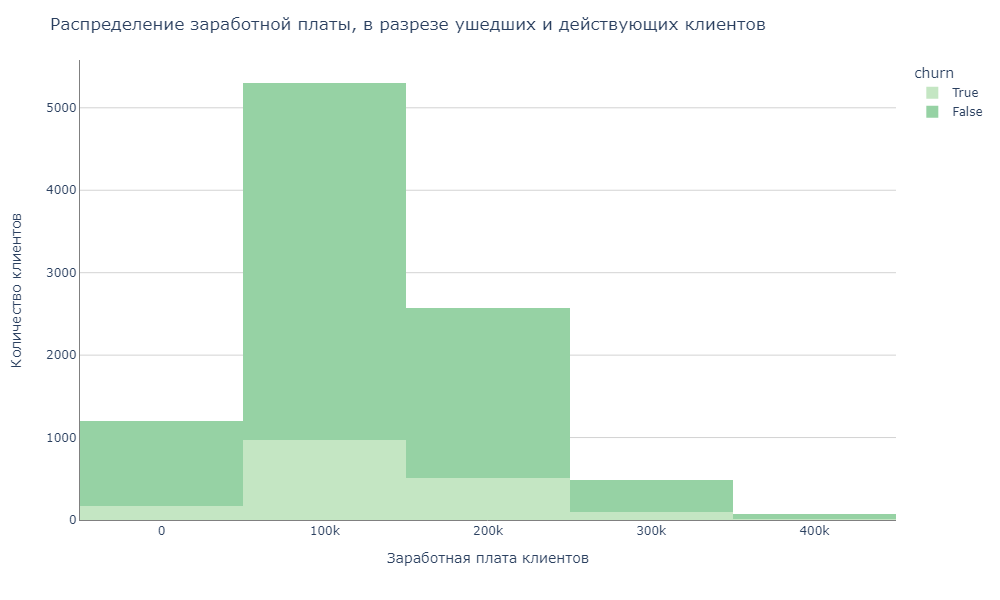

In [63]:
histogram_churn(data_banks.query('est_salary < 400000'), #таблица
                'est_salary', #х
                'Заработная плата клиентов', #название оси х
                'Количество клиентов', #название оси y
                'Распределение заработной платы, в разрезе ушедших и действующих клиентов', #название графика
                nbins=5 #количество корзин, по умолчанию 5
               )

Можно выделить следующие зарплатные категории:
- до 50 тыс,
- от 50 до 150 тыс,
- от 150 до 250 тыс,
- свыше 250 тыс (сюда же включаем и зарплаты свыше 400 тыс)

Добавим необходимый столбец

In [64]:
#Создадим функцию, которая будет возвращать название категории заработной платы
def salary_cat(est_salary):
    if est_salary < 50000:
        return "до 50 тыс"
    if est_salary >= 50000 and est_salary < 150000:
        return "от 50 до 150 тыс"
    if est_salary >= 150000 and est_salary < 250000:
        return "от 150 до 250 тыс"
    return "свыше 250 тыс"


#Добавим новый столбец в наши данные с обобщенными категориями
data_banks['salary_cat'] = data_banks['est_salary'].apply(salary_cat)

In [65]:
#Проверим все ли верно добавилось
data_banks['salary_cat'].unique()

array(['от 50 до 150 тыс', 'от 150 до 250 тыс', 'до 50 тыс',
       'свыше 250 тыс'], dtype=object)

In [66]:
data_banks.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat,balance_cat,salary_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 50 до 150 тыс
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет,отсутствует информация о балансе,от 50 до 150 тыс
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет,"от 1,25 до 1,75 млн,",от 150 до 250 тыс
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет,отсутствует информация о балансе,от 150 до 250 тыс


### Определение категорий баллов собственности и добавление нового столбца
<a id='20'></a>

Помотрим, как распределены баллы собственности, особенно в разрезе на ушедших и действующих клиентов

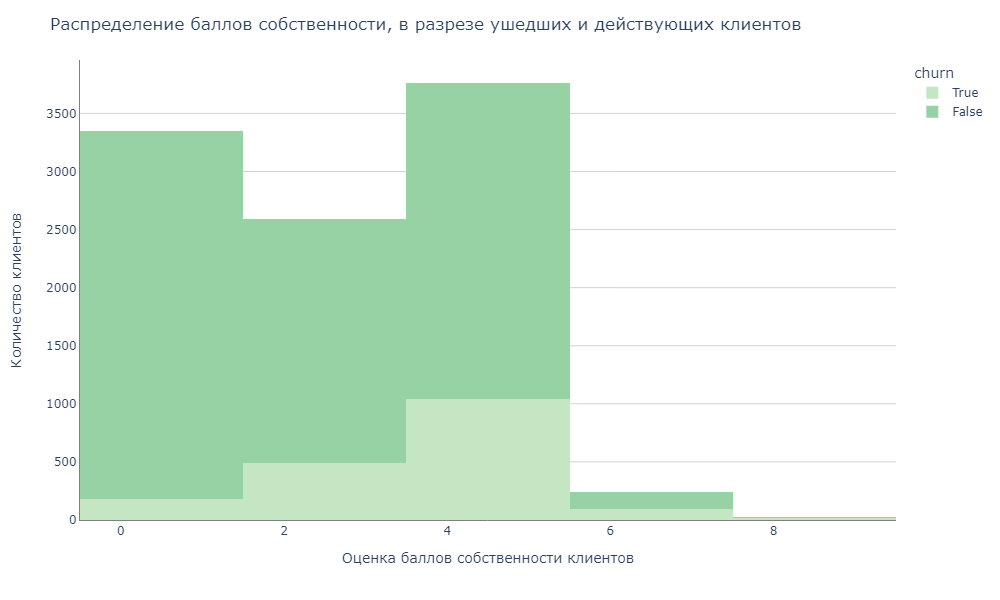

In [67]:
histogram_churn(data_banks, #таблица
                'equity', #х
                'Оценка баллов собственности клиентов', #название оси х
                'Количество клиентов', #название оси y
                'Распределение баллов собственности, в разрезе ушедших и действующих клиентов', #название графика
                nbins=5 #количество корзин, по умолчанию 5
               )

Можем выделить 3 категории оценок:
- низкие - от 0 до 3,
- средние - от 4 до 5,
- высокие - выше 6 баллов

Добавим необходимый столбец

In [68]:
#Создадим функцию, которая будет возвращать название категории оценки собственности
def equity_cat(equity):
    if equity < 4:
        return "низкая (до 4)"
    if equity >= 4 and equity < 6:
        return "средняя (4-6)"
    return "высокая (свыше 6)"


#Добавим новый столбец в наши данные с обобщенными категориями
data_banks['equity_cat'] = data_banks['equity'].apply(equity_cat)

In [69]:
#Проверим все ли верно добавилось
data_banks['equity_cat'].unique()

array(['низкая (до 4)', 'средняя (4-6)', 'высокая (свыше 6)'],
      dtype=object)

In [70]:
data_banks.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat,balance_cat,salary_cat,equity_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,низкая (до 4)
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 50 до 150 тыс,средняя (4-6)
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет,отсутствует информация о балансе,от 50 до 150 тыс,низкая (до 4)
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет,"от 1,25 до 1,75 млн,",от 150 до 250 тыс,средняя (4-6)
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,средняя (4-6)
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6)
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,низкая (до 4)
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,средняя (4-6)
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6)
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет,отсутствует информация о балансе,от 150 до 250 тыс,низкая (до 4)


### Определение категорий баллов кредитного скоринга и добавление нового столбца
<a id='21'></a>

Помотрим, как распределены баллы кредитного скоринга, особенно в разрезе на ушедших и действующих клиентов

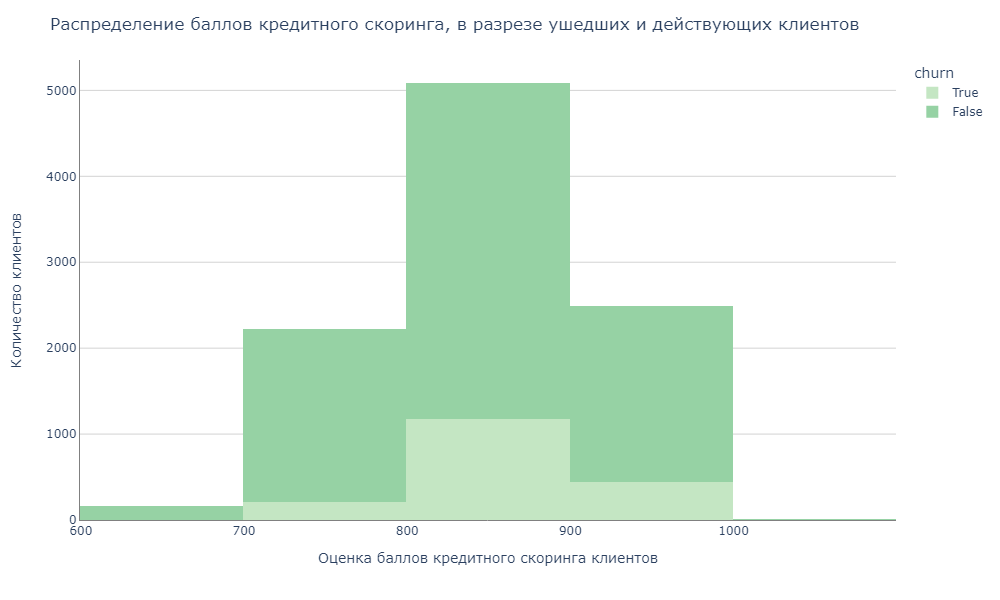

In [71]:
histogram_churn(data_banks, #таблица
                'score', #х
                'Оценка баллов кредитного скоринга клиентов', #название оси х
                'Количество клиентов', #название оси y
                'Распределение баллов кредитного скоринга, в разрезе ушедших и действующих клиентов', #название графика
                nbins=5 #количество корзин, по умолчанию 5
               )

Можем выделить следующие категории по баллам скоринга:
- низкие (до 800),
- средние (800-900),
- выокие (выше 900)

Добавим необходимый столбец

In [72]:
#Создадим функцию, которая будет возвращать название категории оценки собственности
def score_cat(score):
    if score < 800:
        return "низкая (до 800)"
    if score >= 800 and score < 900:
        return "средняя (800-900)"
    return "высокая (свыше 900)"


#Добавим новый столбец в наши данные с обобщенными категориями
data_banks['score_cat'] = data_banks['score'].apply(score_cat)

In [73]:
#Проверим все ли верно добавилось
data_banks['score_cat'].unique()

array(['средняя (800-900)', 'низкая (до 800)', 'высокая (свыше 900)'],
      dtype=object)

In [74]:
data_banks.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat,balance_cat,salary_cat,equity_cat,score_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,низкая (до 4),средняя (800-900)
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 50 до 150 тыс,средняя (4-6),средняя (800-900)
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет,отсутствует информация о балансе,от 50 до 150 тыс,низкая (до 4),средняя (800-900)
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет,"от 1,25 до 1,75 млн,",от 150 до 250 тыс,средняя (4-6),средняя (800-900)
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,средняя (4-6),низкая (до 800)
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6),средняя (800-900)
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,низкая (до 4),средняя (800-900)
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,средняя (4-6),средняя (800-900)
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6),высокая (свыше 900)
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет,отсутствует информация о балансе,от 150 до 250 тыс,низкая (до 4),высокая (свыше 900)


Теперь необходимо закодировать категориальные данные для верного дальнейшего анализа (а именно применения агрегации и проверки кореляции)

### Кодирование категориальных данных
<a id='22'></a>

Сначала необходимо скопировать столбцы которые будем кодировать, чтобы не потерять изначальные данные

In [75]:
data_banks['city_copy'] = data_banks['city']
data_banks['gender_copy'] = data_banks['gender']
data_banks['age_cat_copy'] = data_banks['age_cat']
data_banks['balance_cat_copy'] = data_banks['balance_cat']
data_banks['salary_cat_copy'] = data_banks['salary_cat']
data_banks['equity_cat_copy'] = data_banks['equity_cat']
data_banks['score_cat_copy'] = data_banks['score_cat']

Теперь проведем кодирование

In [76]:
data_banks_cod = pd.get_dummies(data_banks,
                            columns=['city_copy', 'gender_copy', 'age_cat_copy', 
                                     'balance_cat_copy', 'salary_cat_copy', 'equity_cat_copy',
                                    'score_cat_copy'],
                            prefix = ['город', 'пол','возраст', 'баланс', 'зп', 'оценка_собственности',
                                     'баллы_скоринга'])

Теперь данные полностью подготовлены для анализа.

In [77]:
#Проверим все ли верно закодировалось
#Выведем первые 10 строк получившейся таблицы
data_banks_cod.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_cat,balance_cat,salary_cat,equity_cat,score_cat,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М,возраст_до 20 лет,возраст_от 20 до 60 лет,возраст_старше 60 лет,баланс_до 250 тыс,"баланс_от 1,25 до 1,75 млн,",баланс_от 250 до 750 тыс,"баланс_от 750 тыс до 1,25 млн",баланс_отсутствует информация о балансе,"баланс_свыше 1,75 млн",зп_до 50 тыс,зп_от 150 до 250 тыс,зп_от 50 до 150 тыс,зп_свыше 250 тыс,оценка_собственности_высокая (свыше 6),оценка_собственности_низкая (до 4),оценка_собственности_средняя (4-6),баллы_скоринга_высокая (свыше 900),баллы_скоринга_низкая (до 800),баллы_скоринга_средняя (800-900)
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,низкая (до 4),средняя (800-900),0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 50 до 150 тыс,средняя (4-6),средняя (800-900),0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,от 20 до 60 лет,отсутствует информация о балансе,от 50 до 150 тыс,низкая (до 4),средняя (800-900),0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,от 20 до 60 лет,"от 1,25 до 1,75 млн,",от 150 до 250 тыс,средняя (4-6),средняя (800-900),0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,от 20 до 60 лет,до 250 тыс,от 50 до 150 тыс,средняя (4-6),низкая (до 800),0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6),средняя (800-900),0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,False,True,103838.32,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,низкая (до 4),средняя (800-900),0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
7,218868,825,Ярославль,Ж,38,4,458145.40,2,True,True,68085.48,False,от 20 до 60 лет,от 250 до 750 тыс,от 50 до 150 тыс,средняя (4-6),средняя (800-900),0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
8,211686,923,Ярославль,М,54,5,1206337.87,2,True,False,155371.79,False,от 20 до 60 лет,"от 750 тыс до 1,25 млн",от 150 до 250 тыс,средняя (4-6),высокая (свыше 900),0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False,старше 60 лет,отсутствует информация о балансе,от 150 до 250 тыс,низкая (до 4),высокая (свыше 900),0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


## Исследовательский анализ данных
<a id='23'></a>

Посмотрим как коррелируют параметры по отношению к оттоку клиентов

In [78]:
#Создадим матрицу корреляции и возьмем только столбец с оттоком
data_banks_cod_1 = data_banks_cod.corr()[['churn']]

#Удалим строки с ненужными параметрами
data_banks_cod_1 = data_banks_cod_1.drop(index=['churn', 'user_id'])

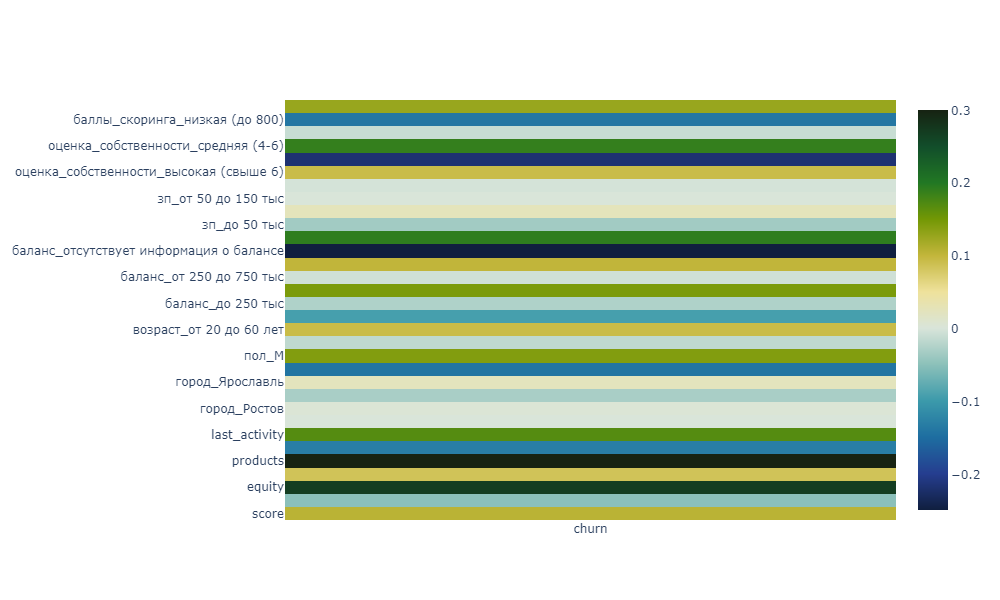

Минимальный коэффициент корреляции - 0.0016829557620539634, максимальный коэффициент корреляции - 0.30062057950707144


In [79]:
#Выведем тепловую карту по полученной матрице корреляции
fig = go.Figure(
    data=(
        go.Heatmap(z = data_banks_cod_1,
                   x = data_banks_cod_1.columns,
                   y = data_banks_cod_1.index,
                   colorscale = 'delta'
                  )
    )
)

fig.update_layout( width = 1000, height = 800)

fig.show(renderer='png', width=1000, height=600, scale=None)

print('Минимальный коэффициент корреляции - {}, максимальный коэффициент корреляции - {}'
      .format(abs(data_banks_cod_1).min()[0], abs(data_banks_cod_1).max()[0]))

Мы видим, что во всех параметрах есть и сильные и слабые зависимости. Минимальный коэффициент близкий к 0 (практически отсутствие зависимости), а максимальный коэффициент далек от 1. Что то точного и конкретного сказать сложно. Поэтому проанализируем, как зависит отток от всех возможных параметров:
- города, пола, возраста,
- оценки стоимости,
- баланса на счете,
- заработной платы,
- количества продуктов,
- наличие кредитной карты,
- активности клиента

Посмотрим на долю отточных клиентов

In [80]:
a = data_banks.groupby('churn').agg({'user_id':'count'}).reset_index()

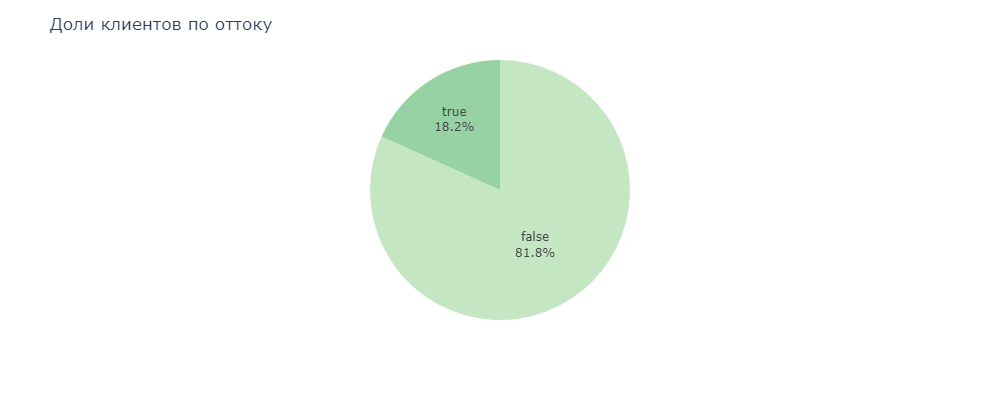

In [81]:
fig = px.pie(a, values='user_id', names='churn', 
             color_discrete_sequence=px.colors.sequential.Blugrn)

fig.update_layout(autosize=False,
                  plot_bgcolor='white',
                  showlegend=False,
                  title='Доли клиентов по оттоку')

fig.update_traces(textinfo='label+percent')

fig.show(renderer='png', width=1000, height=400, scale=None)

Из всех данных чуть больше 18% - это отточные клиенты. Для дальнейшего анализа немобходимо выделить записи только с ушедшими клиентами

In [82]:
data_churn = data_banks_cod.query('churn == True')
print('Доля отточных клиентов по всем данным - {0:.2%}'.format(len(data_churn)/len(data_banks_cod)))

Доля отточных клиентов по всем данным - 18.24%


### Анализ влияния возраста, пола и города на отток
<a id='24'></a>

Посмотрим на распределение возраста, пола и города отточных клиентов

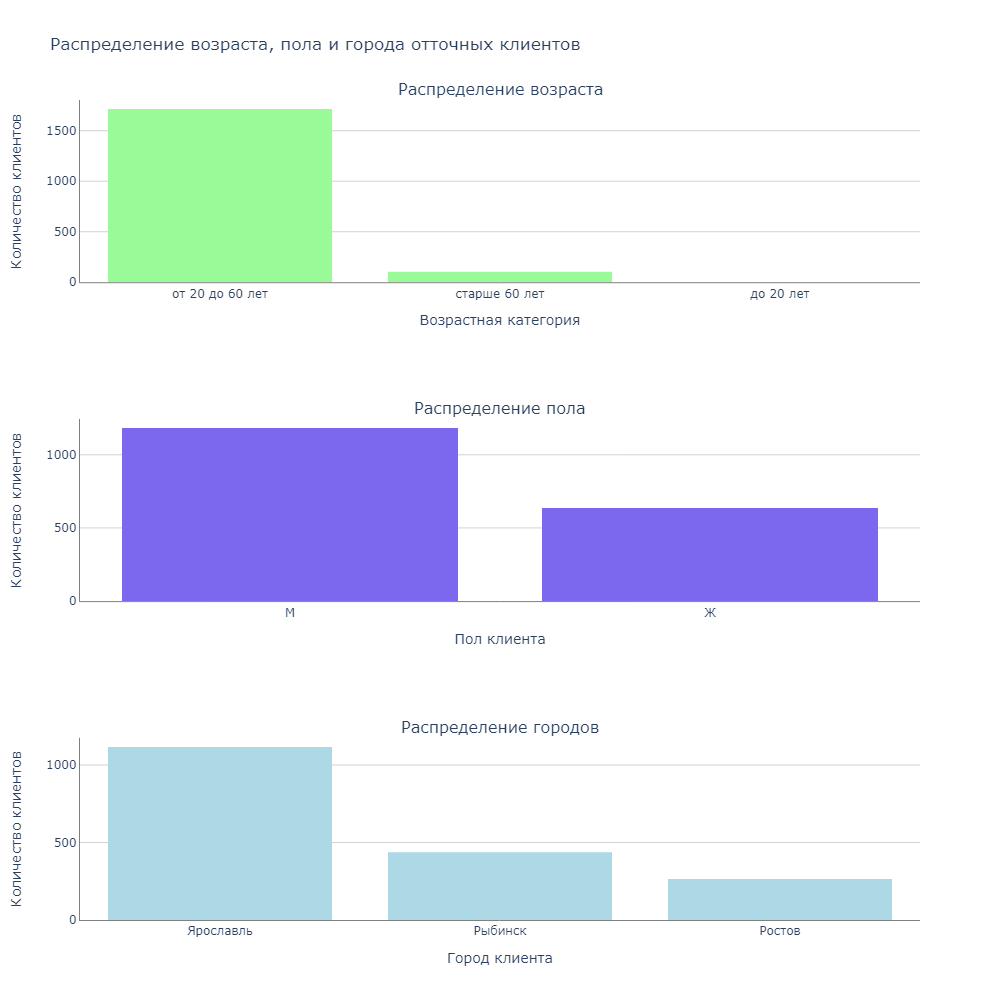

In [83]:
fig = make_subplots(
    rows=3, cols=1,

    specs=[
        [{}], [{}], [{}]
    ],
    subplot_titles=('Распределение возраста',
                    'Распределение пола',
                    'Распределение городов'
                   ),
)   
    
fig.add_trace(
    go.Histogram(x=data_churn['age_cat'],
           orientation='v',
           marker_color='palegreen'),
    row=1, col=1  
)

fig.add_trace(
    go.Histogram(x=data_churn['gender'],
           orientation='v',
           marker_color='mediumslateblue'),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=data_churn['city'],
           orientation='v',
           marker_color='lightblue'),
    row=3, col=1
)

fig.update_xaxes(title_text='Возрастная категория',         
                 row=1, col=1)
fig.update_xaxes(title_text='Пол клиента',
                 row=2, col=1)
fig.update_xaxes(title_text='Город клиента',         
                 row=3, col=1)

fig.update_yaxes(title_text='Количество клиентов',
                 row=1, col=1)
fig.update_yaxes(title_text='Количество клиентов',
                 row=2, col=1)
fig.update_yaxes(title_text='Количество клиентов',
                 row=3, col=1)

fig.update_yaxes(showline=True,
                 linewidth=1,
                 linecolor='grey',
                 categoryorder='total descending',
                 gridcolor='lightgrey')

fig.update_xaxes(showline=True,
                 linewidth=1,
                 linecolor='grey',
                 categoryorder='total descending')
    
fig.update_layout(autosize=False,
                  width=980,
                  height=1000,
                  plot_bgcolor='white',
                  showlegend=False,
                  title='Распределение возраста, пола и города отточных клиентов')
    
fig.show(renderer='png', width=1000, height=1000, scale=None)

Видим, что большая часть отточных клиентов - это мужчины из Ярославля в возрасте от 20 до 60 лет.

### Анализ влияния оценки стоимости на отток
<a id='25'></a>

Посмотрим на распределение оценок стоимости отточных клиентов

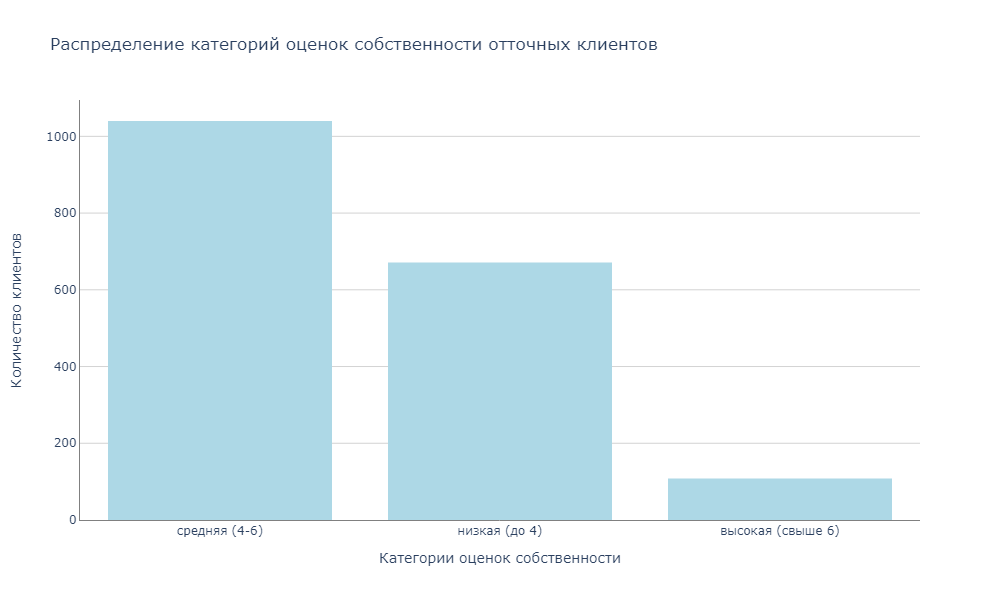

In [84]:
histogram(data_churn['equity_cat'], #x
          'Категории оценок собственности', #название оси х
          'Количество клиентов', #название оси y
          'Распределение категорий оценок собственности отточных клиентов' #название графика
         )

Среди отточных преобладают клиенты со средней оценкой собственности от 4 до 6 баллов.

### Анализ влияния баланса на счете на отток
<a id='26'></a>

Посмотрим на распределение баланса на счете отточных клиентов

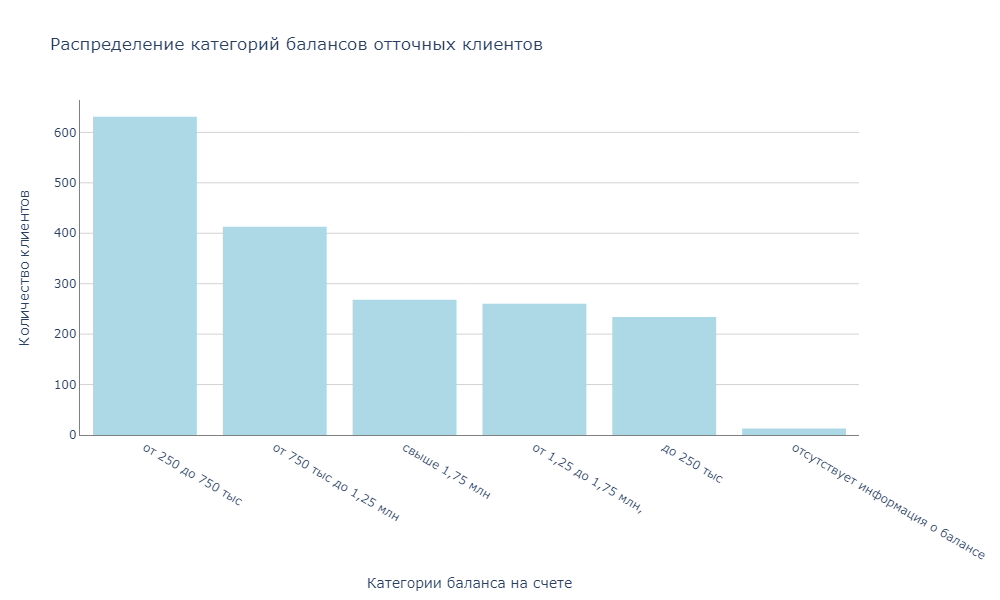

In [85]:
histogram(data_churn['balance_cat'], #x
          'Категории баланса на счете', #название оси х
          'Количество клиентов', #название оси y
          'Распределение категорий балансов отточных клиентов' #название графика
         )

Больше всего отточных клиентов имеют баланс на счете от 250 до 750 тыс.

### Анализ влияния заработной платы на отток
<a id='27'></a>

Посмотрим на распределение заработной платы отточных клиентов

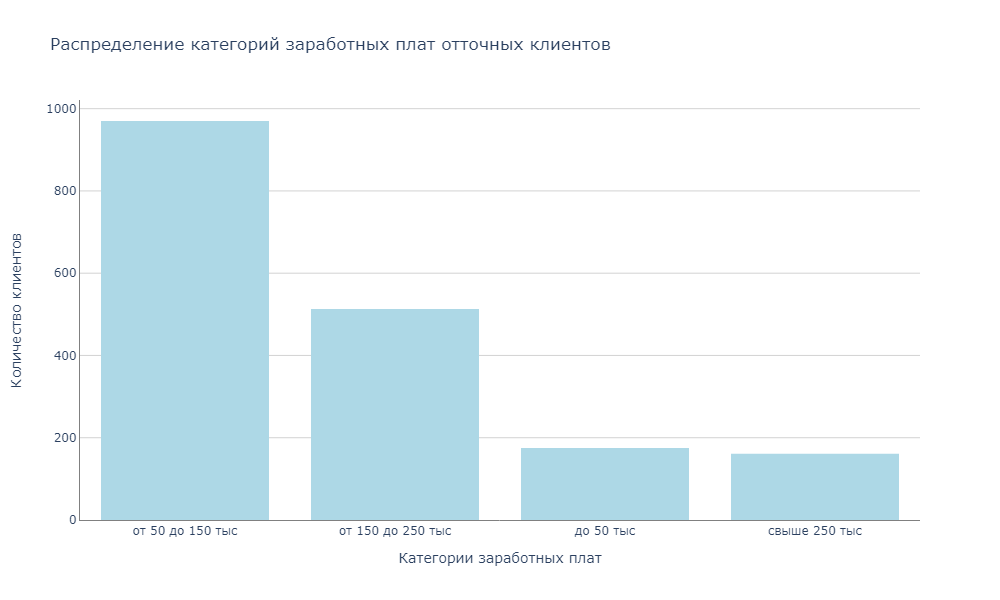

In [86]:
histogram(data_churn['salary_cat'], #x
          'Категории заработных плат', #название оси х
          'Количество клиентов', #название оси y
          'Распределение категорий заработных плат отточных клиентов' #название графика
         )

Больше всего отточных клиентов с зарлатой от 50 до 150 тыс.

### Анализ влияния количества продуктов банка на отток
<a id='28'></a>

Посмотрим на распределение количества продуктов отточных клиентов

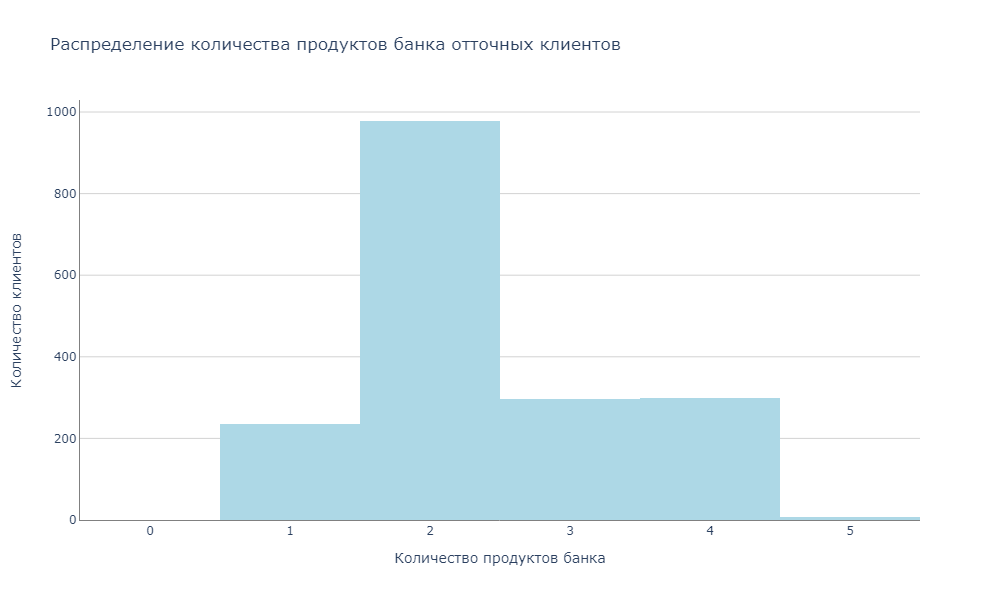

In [87]:
histogram(data_churn['products'], #x
          'Количество продуктов банка', #название оси х
          'Количество клиентов', #название оси y
          'Распределение количества продуктов банка отточных клиентов' #название графика
         )

Больше всего отточных клиентов с 2 продуктами банка.

### Анализ влияния наличия кредитной карты на отток
<a id='29'></a>

Посмотрим на распределение кредитных карт отточных клиентов

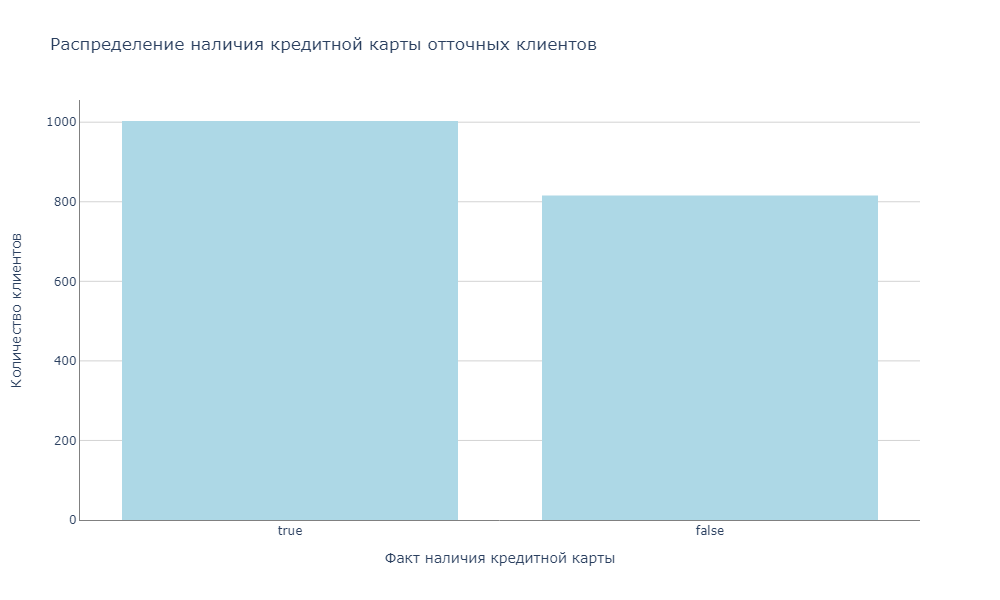

In [88]:
histogram(data_churn['credit_card'], #x
          'Факт наличия кредитной карты', #название оси х
          'Количество клиентов', #название оси y
          'Распределение наличия кредитной карты отточных клиентов' #название графика
         )

Большая чать отточных клиентов имеет кредитную карту банка.

### Анализ влияния активности клиента на отток
<a id='30'></a>

Посмотрим на распределение активности (за последние 30 дней) отточных клиентов

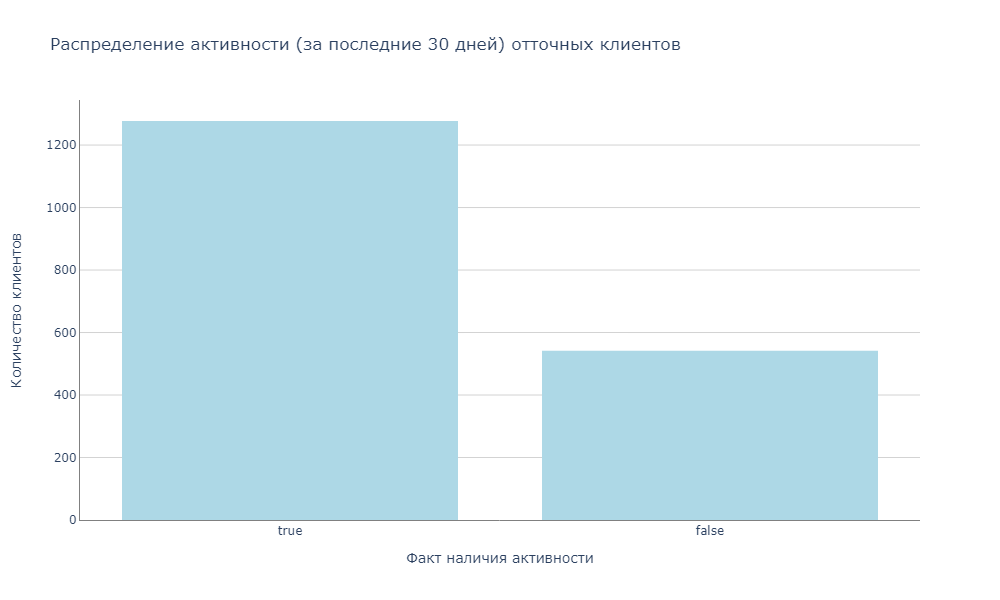

In [89]:
histogram(data_churn['last_activity'], #x
          'Факт наличия активности', #название оси х
          'Количество клиентов', #название оси y
          'Распределение активности (за последние 30 дней) отточных клиентов' #название графика
         )

Большая часть отточных клиентов были активны за последние 30 дней.

### Анализ влияния баллов кредитного скоринга на отток
<a id='31'></a>

Посмотрим на распределение баллов кредитного скоринга отточных клиентов

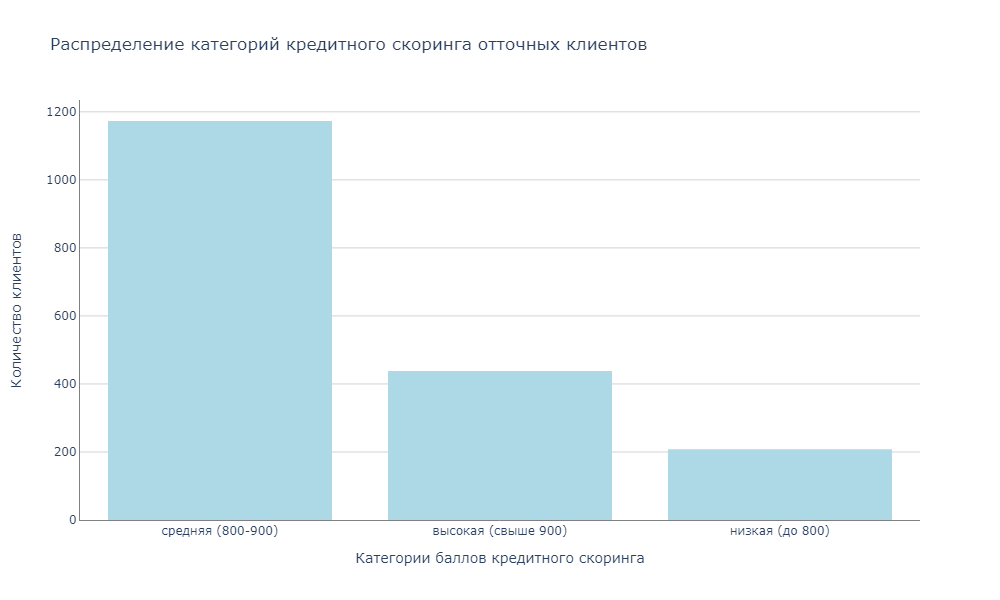

In [90]:
histogram(data_churn['score_cat'], #x
          'Категории баллов кредитного скоринга', #название оси х
          'Количество клиентов', #название оси y
          'Распределение категорий кредитного скоринга отточных клиентов' #название графика
         )

Больше всего отточных клиентов имею средние кредитные скоринговые баллы (от 800 до 900).

### Итоговые параметры, которые сильнее всего влияют на отток
<a id='32'></a>

По итогу видим, что большая часть отточных клиентов это:
- мужчины из Ярославля в возрасте от 20 до 60 лет,
- со средней оценкой собственности от 4 до 6 баллов,
- имеют баланс на счете от 250 до 750 тыс,
- с зарлатой от 50 до 150 тыс,
- с 2 продуктами банка,
- имеет кредитную карту банка,
- были активны за последние 30 дней,
- имею средние кредитные скоринговые баллы (от 800 до 900).

Посмотрим корреляцию между всеми выявленными параметрами

In [91]:
#Делаем выборку по всем подходящим параметрам
param_corr = (
    data_banks_cod.query(
        'gender == "М" and \
        age >= 20 and age < 60 and\
        city == "Ярославль" and\
        equity >= 4 and equity < 6 and\
        balance >= 250000 and balance < 750000 and\
        est_salary >= 50000 and est_salary < 150000 and\
        products == 2 and\
        credit_card == True and\
        last_activity == True and\
        score >= 800 and score < 900')
    .corr() #создаем матрицу корреляции
    .dropna(axis = 1, how='all') #удаляем столбцы с Nan
    .dropna(axis = 0, how='all') #удаляем строки с Nan
    [['churn']] #смотрим только корреляцию с ушедшими и действующими клиентами
    )

#удаляем ненужные строки
param_corr = param_corr.drop(index=['churn', 'user_id'])

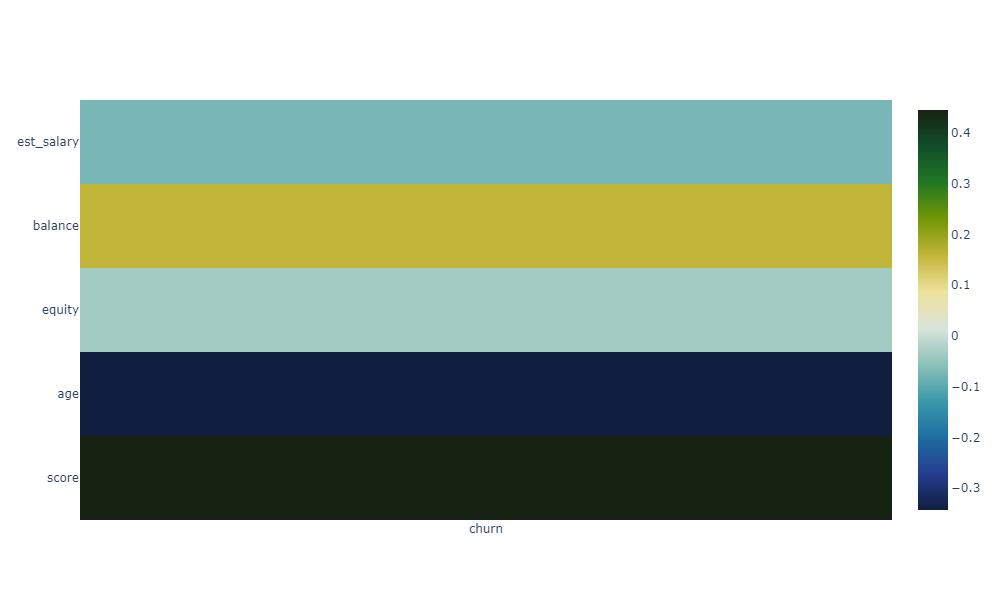

In [92]:
#Выведем тепловую карту по полученной матрице корреляции
fig = go.Figure(
    data=(
        go.Heatmap(z = param_corr,
                   x = param_corr.columns,
                   y = param_corr.index,
                   colorscale = 'delta'
                  )
    )
)

fig.update_layout( width = 1000, height = 500)

fig.show(renderer='png', width=1000, height=600, scale=None)

Больше всего зависимость (сюдя по коэффициенту корреляции) прослеживается с баллами кредитного скоринга, с возрастом и с балансом на счете. Поэтому далее проверим четыре гипотезы на различие параметров у ушедших и действующих клиентов:
- по доходу,
- по баллам скоринга,
- по возрасту и
- по балансу

## Статистическая проверка гипотез
<a id='33'></a>

Проверять гипотезы будем на изначальном датасете без кодирования.

В процессе проверки гипотез нам необходимо посчитать вероятность получить наблюдение на выборке значений, при условии что нулевая гипотеза верна. И если эта вероятность велика, то нулевую гипотезу отвергать не нужно, а если вероятность мала, то необходимо рассмотреть вероятность отвержения нулевой гипотезы и рассмотреть альтернативную.

### Проверка гипотезы №1: доходы клиентов, которые ушли и которые остались отличаются
<a id='34'></a>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Доход (est_salary) отточных клиентов = доходу (est_salary) действующих клиентов
H_A: Доход (est_salary) отточных клиентов ≠ доходу (est_salary) действующих клиентов
```

In [93]:
#Создадим две независимые выборки:
# 1 - доходы отточных клиентов,
# 2 - доходы дейтвующих клиентов

salaty_churn = data_banks.query('churn == True')['est_salary']

salary_not_churn = data_banks.query('churn == False')['est_salary']

#Проверим размер получившихся выборок
if len(salaty_churn) == len(salary_not_churn):
    print('Размер выборок одинаков')
else:
    print('Размер выборок различный. Выборка отточных клиентов равна - {}, выборка действующих клиентов равна - {}'
          .format(len(salaty_churn), len(salary_not_churn)))

Размер выборок различный. Выборка отточных клиентов равна - 1819, выборка действующих клиентов равна - 8155


Для проверки будем использовать Т-критерий Стьюдента для независимых выборок, потому что проверяем две независимые выборки количественных данных достаточных размеров.
Так как выборки сильно отличаются, но размер выборок достаточный, необходимо будет при проверке гипотез указать параметр связанный с неравенством дисперсий выборок.

In [94]:
ttest(salaty_churn, #первая выборка
      salary_not_churn, #вторая выборка
      .05, #значение уровня стат значимости для проверки
      equal_var=False #равны ли дисперсии выборок/размеры выборок
     )

p-значение 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


***По итогу проверки гипотезы №1*** - у нас **нет оснований утверждать**, что **доходы** отточных и действующих клиентов **различны**

### Проверка гипотезы №2: баллы кредитного скоринга клиентов, которые ушли и которые остались отличаются
<a id='35'></a>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Баллы кредитного скоринга (score) отточных клиентов = баллам кредитного скоринга (score) действующих клиентов
H_A: Баллы кредитного скоринга (score) отточных клиентов ≠ баллам кредитного скоринга (score) действующих клиентов
```

In [95]:
#Создадим две независимые выборки:
# 1 - баллы кредитног скоринга отточных клиентов,
# 2 - баллы кредитног скоринга дейтвующих клиентов

score_churn = data_banks.query('churn == True')['score']

score_not_churn = data_banks.query('churn == False')['score']

#Проверим размер получившихся выборок
if len(score_churn) == len(score_not_churn):
    print('Размер выборок одинаков')
else:
    print('Размер выборок различный. Выборка отточных клиентов равна - {}, выборка действующих клиентов равна - {}'
          .format(len(score_churn), len(score_not_churn)))

Размер выборок различный. Выборка отточных клиентов равна - 1819, выборка действующих клиентов равна - 8155


Для проверки будем использовать Т-критерий Стьюдента для независимых выборок, потому что проверяем две независимые выборки количественных данных достаточных размеров. Так как выборки сильно отличаются, но размер выборок достаточный, необходимо будет при проверке гипотез указать параметр связанный с неравенством дисперсий выборок.

In [96]:
ttest(score_churn, #первая выборка
      score_not_churn, #вторая выборка
      .05, #значение уровня стат значимости для проверки
      equal_var=False #равны ли дисперсии выборок/размеры выборок
     )

p-значение 8.60332714629934e-38
Отвергаем нулевую гипотезу


***По итогу проверки гипотезы №2*** - мы можем сказать, что скорее всего **баллы кредитного скоринга** отточных и действующих клиентов **различны**.

В таком случае, проверим гипотезу №2.1, что в среднем баллы кредитного скоринга отточных клиентов больше средних баллов кредитного скоринга действующих клиентов.

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Средние баллы кредитного скоринга (score) отточных клиентов > средних баллов кредитного скоринга (score) действующих клиентов
H_A: Средние баллы кредитного скоринга (score) отточных клиентов < средних баллов кредитного скоринга (score) действующих клиентов
```

In [97]:
ttest_one(score_churn, #первая выборка (отточные)
          score_not_churn, #вторая выборка (действующие)
          .05, #значение уровня стат значимости для проверки
          equal_var=False #равны ли дисперсии выборок/размеры выборок
         )

p-значение 8.60332714629934e-38
Не получилось отвергнуть нулевую гипотезу


***По итогу проверки гипотезы №2.1*** - мы можем предположить, что *средние баллы кредитного скоринга* **отточных** клиентов **больше** *средних баллов кредитного скоринга* **действующих** клиентов.

### Проверка гипотезы №3: возраст клиентов, которые ушли и которые остались отличаются
<a id='36'></a>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Возраст (age) отточных клиентов = возрасту (age) действующих клиентов
H_A: Возраст (age) отточных клиентов ≠ возрасту (age) действующих клиентов
```

In [98]:
#Создадим две независимые выборки:
# 1 - возраст отточных клиентов,
# 2 - возраст дейтвующих клиентов

age_churn = data_banks.query('churn == True')['age']

age_not_churn = data_banks.query('churn == False')['age']

#Проверим размер получившихся выборок
if len(age_churn) == len(age_not_churn):
    print('Размер выборок одинаков')
else:
    print('Размер выборок различный. Выборка отточных клиентов равна - {}, выборка действующих клиентов равна - {}'
          .format(len(age_churn), len(age_not_churn)))

Размер выборок различный. Выборка отточных клиентов равна - 1819, выборка действующих клиентов равна - 8155


Для проверки будем использовать Т-критерий Стьюдента для независимых выборок, потому что проверяем две независимые выборки количественных данных достаточных размеров. Так как выборки сильно отличаются, но размер выборок достаточный, необходимо будет при проверке гипотез указать параметр связанный с неравенством дисперсий выборок.

In [99]:
ttest(age_churn, #первая выборка
      age_not_churn, #вторая выборка
      .05, #значение уровня стат значимости для проверки
      equal_var=False #равны ли дисперсии выборок/размеры выборок
     )

p-значение 1.1721656853879547e-07
Отвергаем нулевую гипотезу


***По итогу проверки гипотезы №3*** - мы можем сказать, что скорее всего **возраст** отточных и действующих клиентов **различен**.

В таком случае, проверим гипотезу №3.1, что в среднем возраст отточных клиентов выше среднего возраста действующих клиентов.

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Средний возраст (age) отточных клиентов > среднего возраста (age) действующих клиентов
H_A: Средний возраст (age) отточных клиентов < среднего возраста (age) действующих клиентов
```

In [100]:
ttest_one(age_churn, #первая выборка (отточные)
          age_not_churn, #вторая выборка (действующие)
          .05, #значение уровня стат значимости для проверки
          equal_var=False #равны ли дисперсии выборок/размеры выборок
         )

p-значение 1.1721656853879547e-07
Отвергаем нулевую гипотезу


***По итогу проверки гипотезы №3.1*** - мы можем предположить, что *средний возраст* **отточных** клиентов **меньше** *среднего возраста* **действующих** клиентов.

### Проверка гипотезы №4: баланс на счете клиентов, которые ушли и которые остались отличаются
<a id='37'></a>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Баланс на счете (balance) отточных клиентов = баланс на счете (balance) действующих клиентов
H_A: Баланс на счете (balance) отточных клиентов ≠ баланс на счете (balance) действующих клиентов
alpha = 0.05
```

In [101]:
#Создадим две независимые выборки:
# 1 - баланс на счете отточных клиентов,
# 2 - баланс на счете дейтвующих клиентов

balance_churn = data_banks.query('churn == True')['balance']

balance_not_churn = data_banks.query('churn == False')['balance']

#Проверим размер получившихся выборок
if len(balance_churn) == len(balance_not_churn):
    print('Размер выборок одинаков')
else:
    print('Размер выборок различный. Выборка отточных клиентов равна - {}, выборка действующих клиентов равна - {}'
          .format(len(balance_churn), len(balance_not_churn)))

Размер выборок различный. Выборка отточных клиентов равна - 1819, выборка действующих клиентов равна - 8155


Для проверки будем использовать Т-критерий Стьюдента для независимых выборок, потому что проверяем две независимые выборки количественных данных достаточных размеров. Так как выборки сильно отличаются, но размер выборок достаточный, необходимо будет при проверке гипотез указать параметр связанный с неравенством дисперсий выборок.

In [102]:
ttest(balance_churn, #первая выборка
      balance_not_churn, #вторая выборка
      .05, #значение уровня стат значимости для проверки
      equal_var=False #равны ли дисперсии выборок/размеры выборок
     )

p-значение 1.7317408579112936e-13
Отвергаем нулевую гипотезу


***По итогу проверки гипотезы №4*** - мы можем сказать, что скорее всего **баланс на счете** отточных и действующих клиентов **различен**.

В таком случае, проверим гипотезу №4.1, что в среднем баланс на счете отточных клиентов выше среднего баланса на счете действующих клиентов.

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Средний баланс на счете (balance) отточных клиентов > среднего баланса на счете (balance) действующих клиентов
H_A: Средний баланс на счете (balance) отточных клиентов < среднего возраста (balance) действующих клиентов
```

In [103]:
ttest_one(balance_churn, #первая выборка (отточные)
          balance_not_churn, #вторая выборка (действующие)
          .05, #значение уровня стат значимости для проверки
          equal_var=False #равны ли дисперсии выборок/размеры выборок
         )

p-значение 1.7317408579112936e-13
Не получилось отвергнуть нулевую гипотезу


***По итогу проверки гипотезы №4.1*** - мы можем предположить, что *средний баланс на счете* **отточных** клиентов **больше** *среднего баалнса на счете* **действующих** клиентов.

### Вывод после проверок всех гипотез
<a id='38'></a>

По итогу всех проверок:
- у нас **нет оснований утверждать**, что **доходы** отточных и действующих клиентов **различны**,
- можем предположить, что *средние баллы кредитного скоринга* **отточных** клиентов **больше** *средних баллов кредитного скоринга* **действующих** клиентов,
- можем предположить, что *средний возраст* **отточных** клиентов **меньше** *среднего возраста* **действующих** клиентов,
- можем предположить, что *средний баланс на счете* **отточных** клиентов **больше** *среднего баалнса на счете* **действующих** клиентов.

## Сегментация на основе стратегических показателей
<a id='39'></a>

Напомним итоговые показатели:
- мужчины из Ярославля в возрасте от 20 до 60 лет,
- со средней оценкой собственности от 4 до 6 баллов,
- имеют баланс на счете от 250 до 750 тыс,
- с зарлатой от 50 до 150 тыс,
- с 2 продуктами банка,
- имеет кредитную карту банка,
- были активны за последние 30 дней,
- имею средние кредитные скоринговые баллы (от 800 до 900).

Выделим несколько конкретных сегментов клиентов склонных к уходу из банка с помощью выделенных параметров

### Выделение сегмента №1
<a id='40'></a>

Первым сегментом выделим мужчин из Ярославля в возрасте от 20 до 60 лет

In [104]:
segment_1 = data_banks.query('city == "Ярославль" and\
                             gender == "М" and\
                             age >= 20 and age < 60')

#Посмотрим размер сегмента
segment_1_name = 'Мужчины из Ярославля в возрасте от 20 до 60 лет'
print('Сегмент №1 - {}'.format(segment_1_name))
print('Количество клиентов в сегменте - {}'.format(len(segment_1)))

segment_1_part = len(segment_1)/len(data_banks)
#Посмотрим долю отточных клиентов из этого сегмента
print('Доля отточных клиентов в сегменте - {0:.2%}'.format(segment_1_part))

Сегмент №1 - Мужчины из Ярославля в возрасте от 20 до 60 лет
Количество клиентов в сегменте - 2828
Доля отточных клиентов в сегменте - 28.35%


Для нахождения других сегментов посмотрим корреляции между всеми выделенными параметрами

In [105]:
#Делаем выборку по всем подходящим параметрам
param = (
    data_banks_cod.query(
        'gender == "М" and \
        age >= 20 and age < 60 and\
        city == "Ярославль" and\
        equity >= 4 and equity < 6 and\
        balance >= 250000 and balance < 750000 and\
        est_salary >= 50000 and est_salary < 150000 and\
        products == 2 and\
        credit_card == True and\
        last_activity == True and\
        score >= 800 and score < 900')
     .corr() #создаем матрицу корреляции
     .dropna(axis = 1, how='all') #удаляем столбцы с Nan
     .dropna(axis = 0, how='all') #удаляем строки с Nan
     .drop(columns=['user_id', 'churn']) #удаляем ненужные столбцы
     .drop(index=['churn', 'user_id'])#удаляем ненужные строки
    )

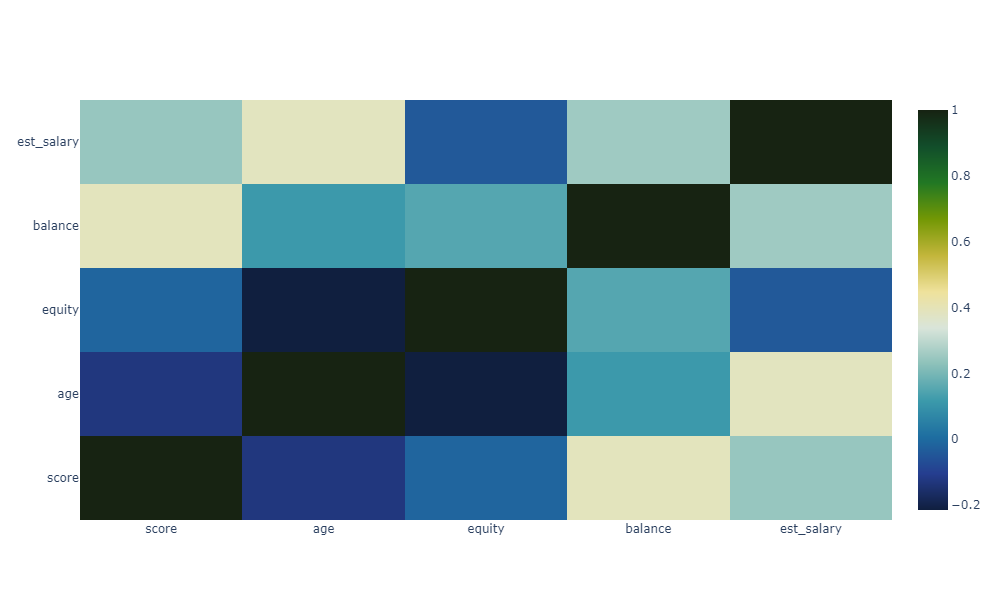

In [106]:
#Выведем тепловую карту по полученной матрице корреляции
fig = go.Figure(
    data=(
        go.Heatmap(z = param,
                   x = param.columns,
                   y = param.index,
                   colorscale = 'delta'
                  )
    )
)

fig.update_layout( width = 1000, height = 500)

fig.show(renderer='png', width=1000, height=600, scale=None)

Можно выделить следующие взаимосвязи между параметрами:
- баллы скоринга с балансом на счете,
- возраст и заработная плата,
- баллы собственности и возраст,
- заработная плата и возраст и баланс на счете

По этим сочетаниям параметров выделим еще 4 сегмента

### Выделение сегмента №2
<a id='41'></a>

Вторым выделим сегмент клиентов с кредитным скорингом от 800 до 900 баллов и с балансом от 250 до 750 тыс

In [107]:
segment_2 = data_banks.query('score >= 800 and score < 900 and\
                             balance >= 250000 and balance < 750000')

#Посмотрим размер сегмента
segment_2_name = 'Клиенты с балансом на счете от 250 до 750 тыс и сбаллами кредитного скоринга от 800 до 900'
print('Сегмент №2 - {}'.format(segment_2_name))
print('Количество клиентов в сегменте - {}'.format(len(segment_2)))

segment_2_part = len(segment_2)/len(data_banks)
#Посмотрим долю отточных клиентов из этого сегмента
print('Доля отточных клиентов в сегменте - {0:.2%}'.format(segment_2_part))

Сегмент №2 - Клиенты с балансом на счете от 250 до 750 тыс и сбаллами кредитного скоринга от 800 до 900
Количество клиентов в сегменте - 2383
Доля отточных клиентов в сегменте - 23.89%


### Выделение сегмента №3
<a id='42'></a>

Третьим выделим сегмент клиентов в возрасте от 20 до 60 лет с заработной платой от 50 до 150 тыс

In [108]:
segment_3 = data_banks.query('age >= 20 and age < 60 and\
                             est_salary >= 50000 and est_salary < 150000')

#Посмотрим размер сегмента
segment_3_name = 'Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс'
print('Сегмент №3 - {}'.format(segment_3_name))
print('Количество клиентов в сегменте - {}'.format(len(segment_3)))

segment_3_part = len(segment_3)/len(data_banks)
#Посмотрим долю отточных клиентов из этого сегмента
print('Доля отточных клиентов в сегменте - {0:.2%}'.format(segment_3_part))

Сегмент №3 - Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс
Количество клиентов в сегменте - 4592
Доля отточных клиентов в сегменте - 46.04%


### Выделение сегмента №4
<a id='43'></a>

Четвертым выделим сегмент клиентов в возрасте от 20 до 60 лет и с баллами собственности от 4 до 6

In [109]:
segment_4 = data_banks.query('equity >= 4 and equity < 6 and\
                             age >= 20 and age < 60')

#Посмотрим размер сегмента
segment_4_name = 'Клиенты в возрасте от 20 до 60 лет с баллами собственности от 4 до 6'
print('Сегмент №4 - {}'.format(segment_4_name))
print('Количество клиентов в сегменте - {}'.format(len(segment_4)))

segment_4_part = len(segment_4)/len(data_banks)
#Посмотрим долю отточных клиентов из этого сегмента
print('Доля отточных клиентов в сегменте - {0:.2%}'.format(segment_4_part))

Сегмент №4 - Клиенты в возрасте от 20 до 60 лет с баллами собственности от 4 до 6
Количество клиентов в сегменте - 3321
Доля отточных клиентов в сегменте - 33.30%


### Выделение сегмента №5
<a id='44'></a>

Пятым выделим сегмент клиентов в возрасте от 20 до 60 лет с заработной платой от 50 до 150 тыс и с балансом на счете от 250 до 750 тыс

In [110]:
segment_5 = data_banks.query('est_salary >= 50000 and est_salary < 150000 and\
                             age >= 20 and age < 60 and\
                             balance >= 250000 and balance < 750000')

#Посмотрим размер сегмента
segment_5_name = 'Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс с балансом на счете от 250 до 750 тыс'
print('Сегмент №5 - {}'.format(segment_5_name))
print('Количество клиентов в сегменте - {}'.format(len(segment_5)))

segment_5_part = len(segment_5)/len(data_banks)
#Посмотрим долю отточных клиентов из этого сегмента
print('Доля отточных клиентов в сегменте - {0:.2%}'.format(segment_5_part))

Сегмент №5 - Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс с балансом на счете от 250 до 750 тыс
Количество клиентов в сегменте - 1987
Доля отточных клиентов в сегменте - 19.92%


### Проведем приоритизацию сегментов
<a id='45'></a>

Чтобы приоритизировать (отсортировать по приоритету) сегменты, создадим таблицу с долями отточных клиентов внутри них и наименованием всех выделенных сегментов

In [111]:
segments = {
    'сегмент 1': [segment_1_part, segment_1_name],
    'сегмент 2': [segment_2_part, segment_2_name],
    'сегмент 3': [segment_3_part, segment_3_name],
    'сегмент 4': [segment_4_part, segment_4_name],
    'сегмент 5': [segment_5_part, segment_5_name],
}
segments=pd.DataFrame.from_dict(segments, orient='index')
segments.columns = ['Доля сегмента', 'Наименование сегманта']

Теперь отсортируем по долям отточных сегментов и таким образом приоритизируем их

In [112]:
prior_segments = segments.sort_values(by='Доля сегмента', ascending=False)
pd.options.display.max_colwidth=105
prior_segments

,Доля сегмента,Наименование сегманта
сегмент 3,0.460397,Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс
сегмент 4,0.332966,Клиенты в возрасте от 20 до 60 лет с баллами собственности от 4 до 6
сегмент 1,0.283537,Мужчины из Ярославля в возрасте от 20 до 60 лет
сегмент 2,0.238921,Клиенты с балансом на счете от 250 до 750 тыс и сбаллами кредитного скоринга от 800 до 900
сегмент 5,0.199218,Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс с балансом на счете от 250 до 750 тыс


Список сегментов по приоритизации:
1. Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс (сегмент №3)
2. Клиенты в возрасте от 20 до 60 лет с баллами собственности от 4 до 6 (сегмент №4)
3. Мужчины из Ярославля в возрасте от 20 до 60 лет (сегмент №1)
4. Клиенты с балансом на счете от 250 до 750 тыс и сбаллами кредитного скоринга от 800 до 900 (сегмент №2)
5. Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс с балансом на счете от 250 до 750 тыс (сегмент №5)

## Общий вывод и рекомендации
<a id='46'></a>

### Общий вывод после всех обработок и проверок
<a id='47'></a>

Цель - для менеджеров отдела маркетинга банка, необходимо проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка. Чтобы в дальнейшем менеджеры могли выявить и реализовать воздействие на эти сегменты для уменьшения отточности клиентов.

В нашем распоряжении данные о 10000 клиентов банка "Метанпром", распологающегося в Ярославле и областных городах: Ростов Великий и Рыбинск.

Представлена информация о:
- идентификаторе пользователя,
- баллов кредитного скоринга,
- город проживания, пол и возраст клиента,
- количество баллов собственности,
- баланс на счете, также количество продуктов, которыми пользуется клиент,
- заработная плата клиента,
- и отметки о наличии кредитной карты, активности клиента и факте его ухода.

Необходимо было:
- переименовать колонки,
- скорректировать типы данных,
- проанализировать пропущенные значения,
- найти неявные дубликаты, если они присутствуют,
- изучить возможные аномальные значения.

Было сделано:
- привели наименование колонок к нижнему регистру и в наименовании колонки об уникальном идентификаторе добавили `_`,
- изменили типы данных о наличии кредитной карты, активности и ухода клиента на логический,
- изменили тип данных о баллах кредитного скоринга на целочисленный,
- оценили пропущенные значения в данных о возрасте (0,26%) и удалили клиентов с данными пропусками, и потом изменили тип данных на целочиленный,
- оценили пропущенные значения о балансе на счете клиентов (почти 23%) и оставили их как есть, потому что нет логической замены этих пропусков
- нашли 50 дублиующихся идентификатора пользователя, однако это совершенно разные клиенты.
- выяснили, что основная часть клиентов имеет на счетах от 0 до 2 млн, аномальных балансов клиенты не имеют,
- нашли 1 клиента без продуктов от банка,
- выяснили, что в основном присутствуют клиенты с заработной платой от ее минимума - около 2,5 тыс и примерно до 400 тыс; присутствуют индивидумы с заработной платой свыше 1 млн, но это возможные значения

Также добавили 3 столбца с категоризацией возрата, баланса на счете и заработной платой клиентов.

Могу предположить, что пропущенные значения произошли из-за технического сбоя.

**Анализ данных**

Из всех данных около 18% клиентов являются отточными.

Проанализировав все параметры видим, что большая часть отточных клиентов это:
- мужчины из Ярославля в возрасте от 20 до 60 лет,
- со средней оценкой собственности от 4 до 6 баллов,
- имеют баланс на счете от 250 до 750 тыс,
- с зарлатой от 50 до 150 тыс,
- с 2 продуктами банка,
- имеет кредитную карту банка,
- были активны за последние 30 дней,
- имею средние кредитные скоринговые баллы (от 800 до 900).

**Проверка статистических гипотез**

По итогу всех проверок:
- у нас **нет оснований утверждать**, что **доходы** отточных и действующих клиентов **различны**,
- можем предположить, что *средние баллы кредитного скоринга* **отточных** клиентов **больше** *средних баллов кредитного скоринга* **действующих** клиентов,
- можем предположить, что *средний возраст* **отточных** клиентов **меньше** *среднего возраста* **действующих** клиентов,
- можем предположить, что *средний баланс на счете* **отточных** клиентов **больше** *среднего баалнса на счете* **действующих** клиентов.

### Рекомендации
<a id='48'></a>

После проверок гипотез могу предложить обратить внимание на то, что:
- баллы кредитного скоринга у отточных клиентов больше чем у действующих и находятся они в границах 800-900,
- возраст отточных клиентов от 20 до 60 лет,
- баланс на счете у отточных клиентов больше и находится он в границах 250 - 750 тыс

Значит привлекать и удерживать необходимо молодых платежеспособных клиентов со средними балансами на счетах

Также выделив 5 сегментов отточных клиентов и расположив их по важности, могу рекомендовать следующие группы клиентов для воздействия:
1. Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс (сегмент №3 - отточные 46%)
2. Клиенты в возрасте от 20 до 60 лет с баллами собственности от 4 до 6 (сегмент №4 - отточные 33%)
3. Мужчины из Ярославля в возрасте от 20 до 60 лет (сегмент №1 - отточные 28%)
4. Клиенты с балансом на счете от 250 до 750 тыс и сбаллами кредитного скоринга от 800 до 900 (сегмент №2 - отточные 24%)
5. Клиенты в возрасте от 20 до 60 лет с зарплатой от 50 до 150 тыс с балансом на счете от 250 до 750 тыс (сегмент №5 - отточные 20%)